<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

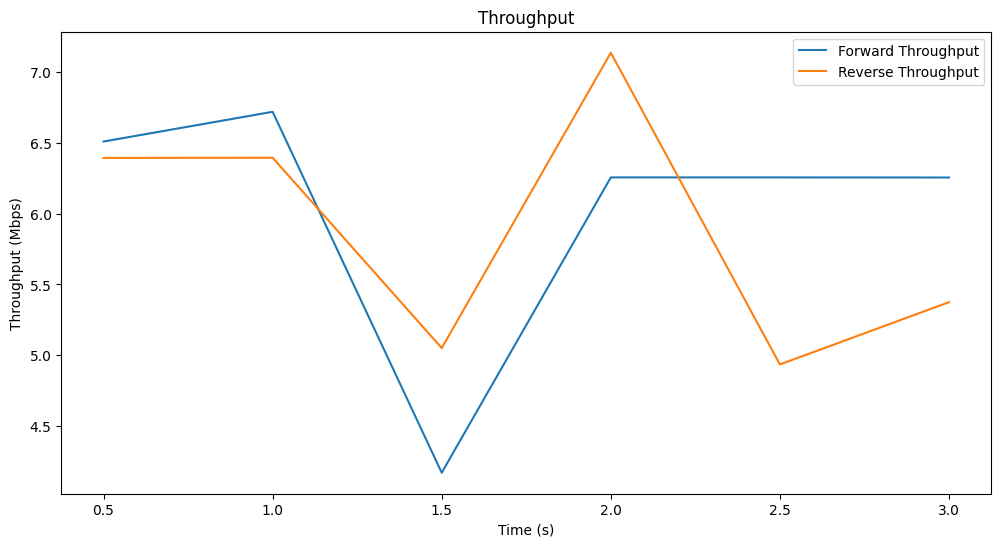

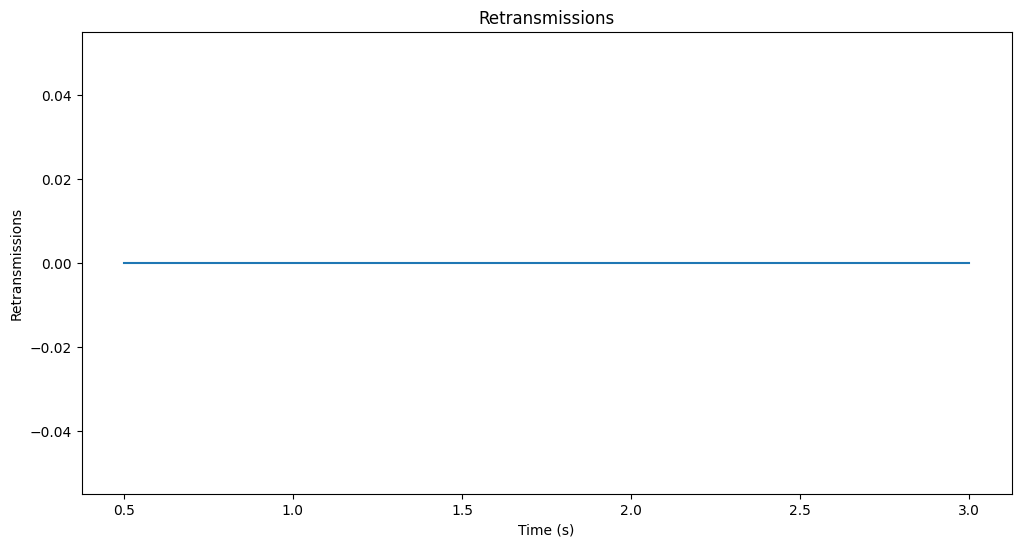

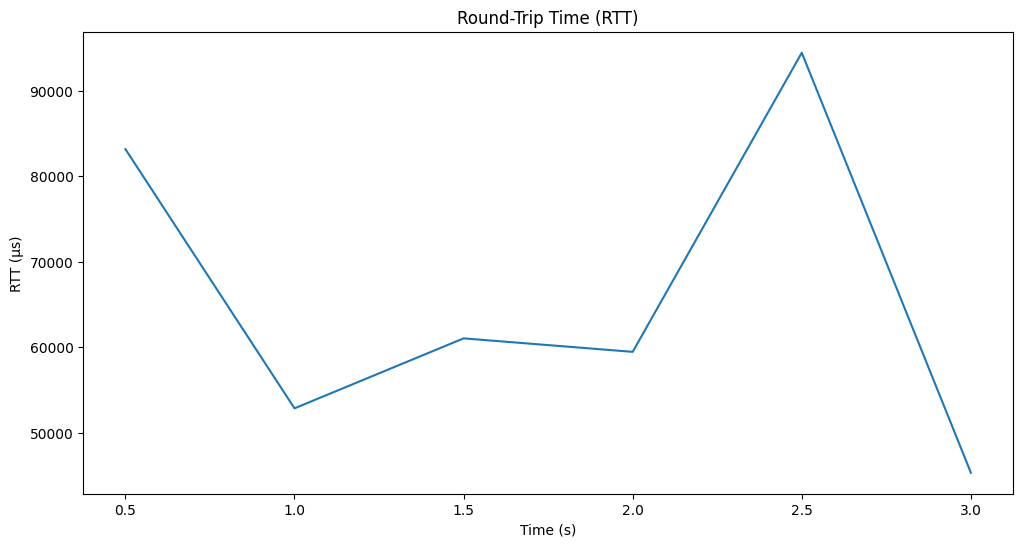

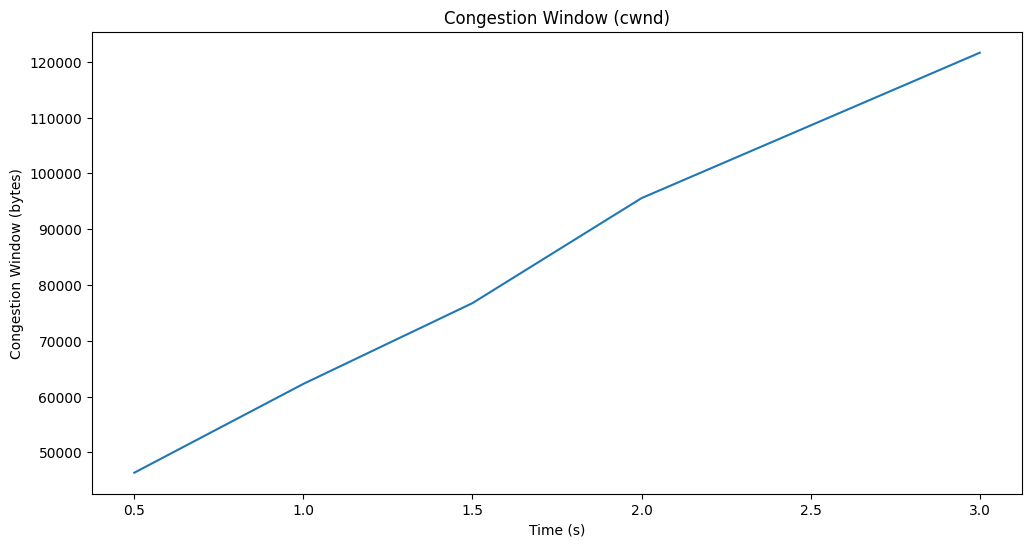

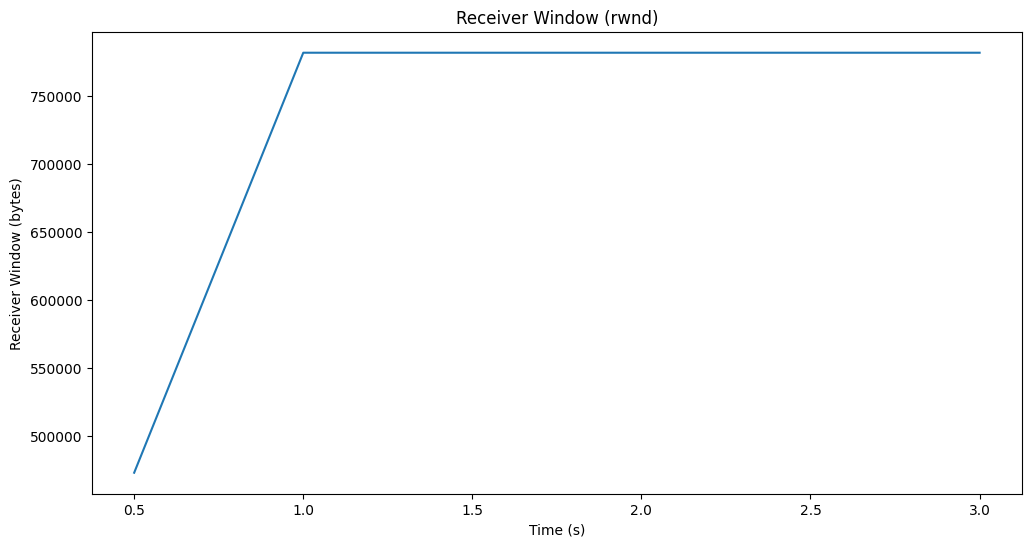

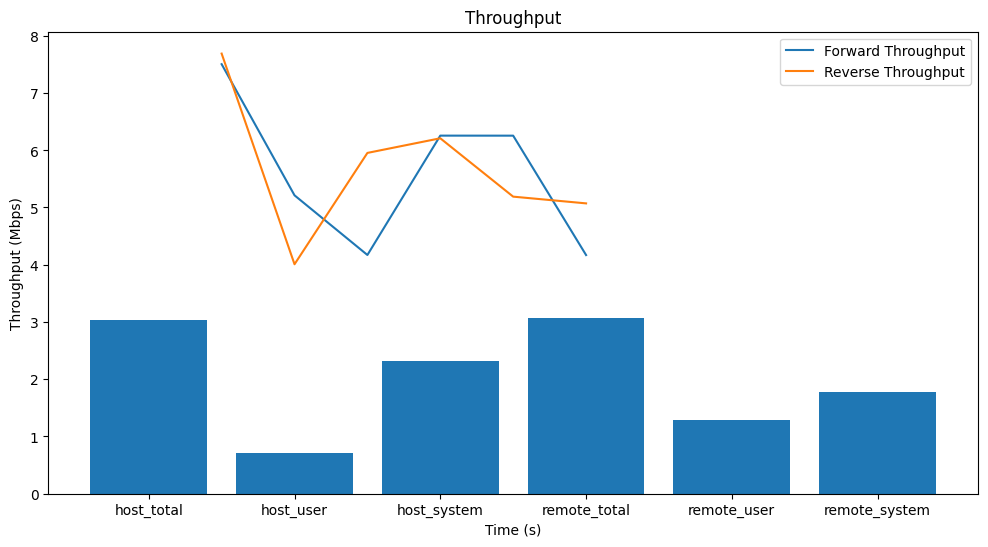

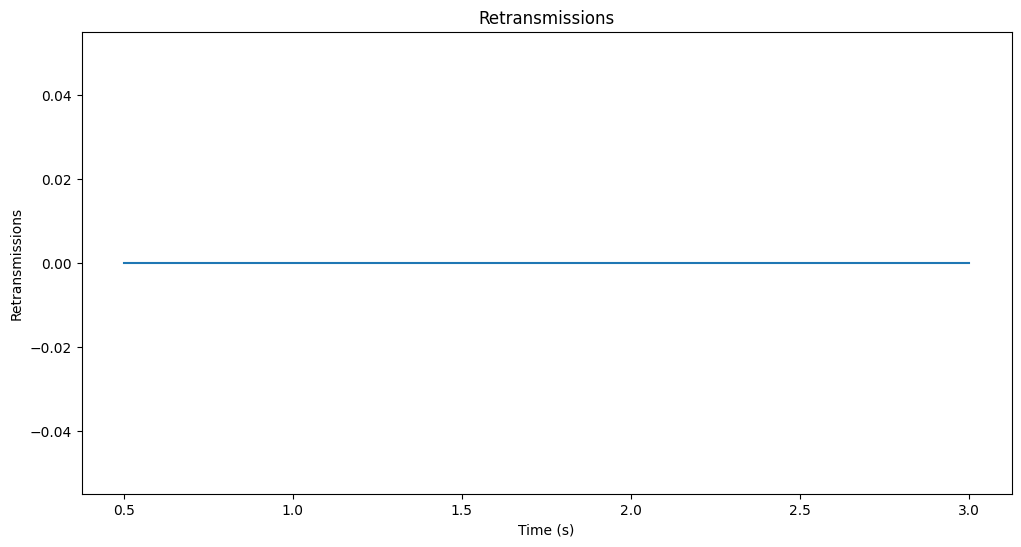

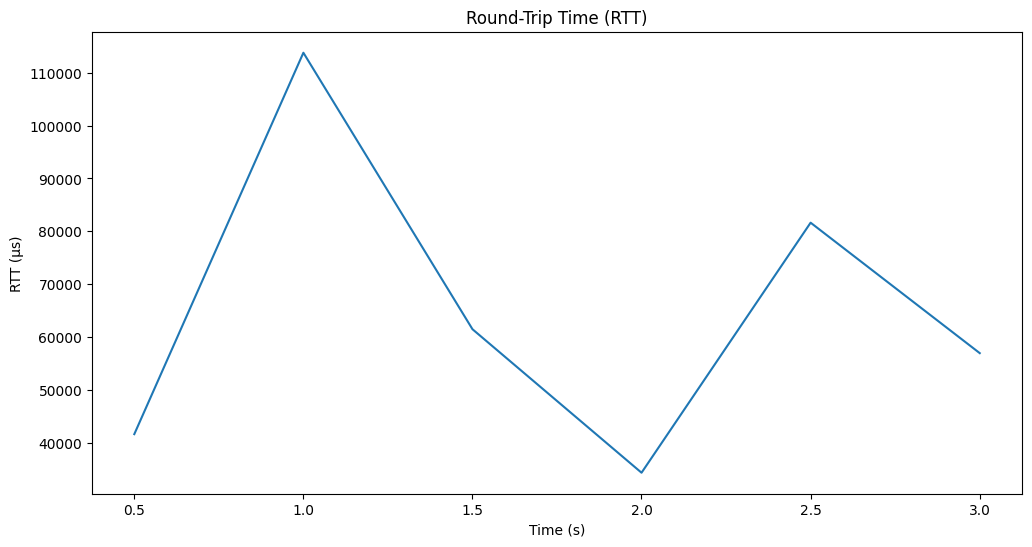

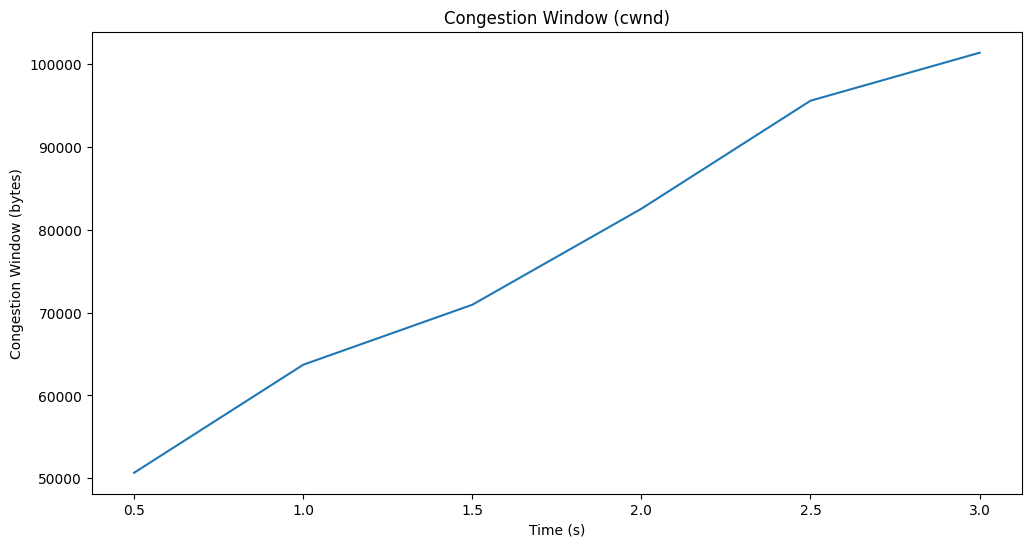

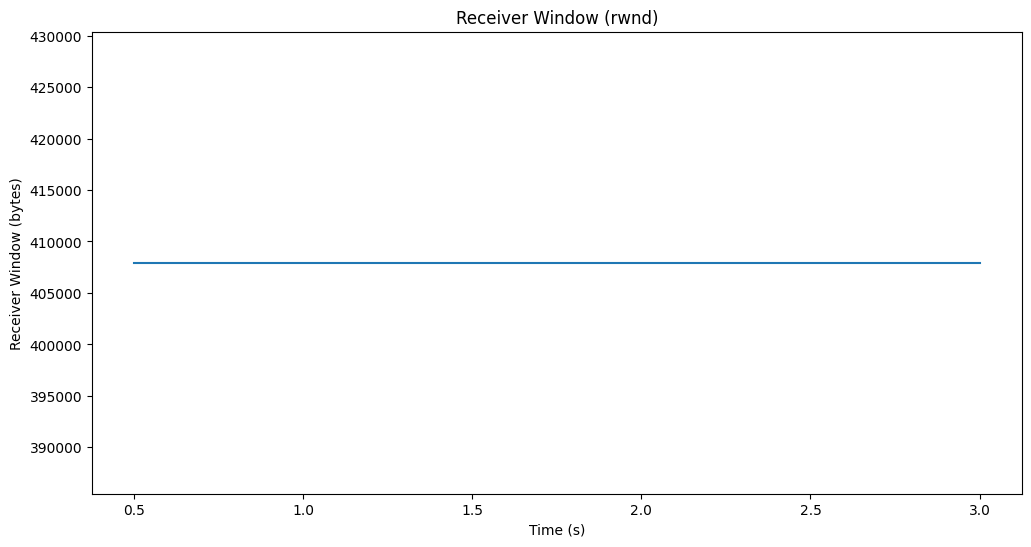

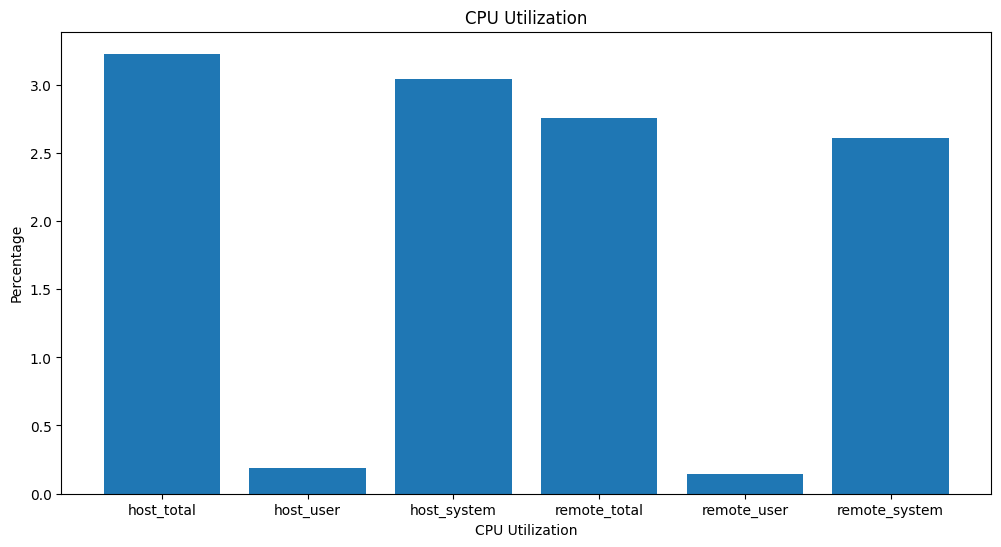

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


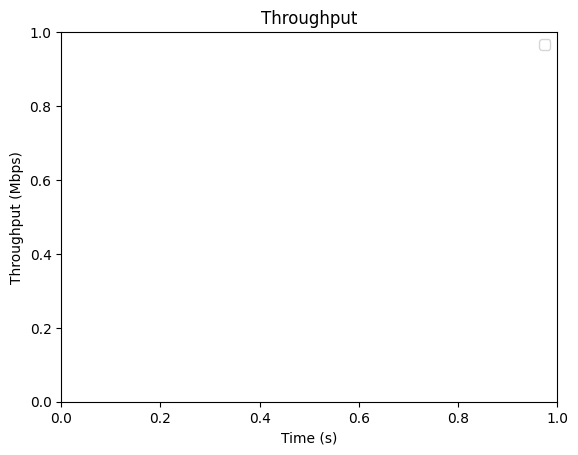

In [39]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
# with open('./data/pi1/iperf0.json') as f:
#     data = json.load(f)
# load all the json files in the folder and iterate over them
import os
import glob

data = []
for filename in glob.glob('./data/pi1/*.json'):
    if "perf"  in filename:
        with open (filename) as f:
            data.append(json.load(f))

# put each iperf on the sme graph

    
# print(data)
    

# Extract relevant data
    
throughput_fig = plt.figure(figsize=(12, 6))
# # Retransmissions
retransmits_fig = plt.figure(figsize=(12, 6))   
# # Round-Trip Time (RTT)
rtt_fig = plt.figure(figsize=(12, 6))
# # Congestion Window (cwnd)
cwnd_fig = plt.figure(figsize=(12, 6))
# # Receiver Window (rwnd)
rwnd_fig = plt.figure(figsize=(12, 6))
# # CPU Utilization
cpu_fig = plt.figure(figsize=(12, 6))


# plot all on the same graph
for d in data:
    intervals = d['intervals']
    num_intervals = len(intervals)
    timestamps = [interval['sum']['end'] for interval in intervals]
    throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
    retransmits = [interval['sum']['retransmits'] for interval in intervals]
    rtts = [interval['streams'][0]['rtt'] for interval in intervals]
    cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
    rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
    reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

    # Throughput
    # throughput_fig = plt.figure(figsize=(12, 6))
    # plot on throughput figure
    plt.figure(throughput_fig.number)
    plt.plot(timestamps, throughputs, label='Forward Throughput')
    plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
    plt.xlabel('Time (s)')
    plt.ylabel('Throughput (Mbps)')
    plt.title('Throughput')
    plt.legend()
    plt.show()
    # Retransmissions
    retransmits_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, retransmits)
    plt.xlabel('Time (s)')
    plt.ylabel('Retransmissions')
    plt.title('Retransmissions')
    plt.show()
    # Round-Trip Time (RTT)
    rtt_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, rtts)
    plt.xlabel('Time (s)')
    plt.ylabel('RTT (μs)')
    plt.title('Round-Trip Time (RTT)')
    plt.show()
    # Congestion Window (cwnd)
    cwnd_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, cwnds)
    plt.xlabel('Time (s)')
    plt.ylabel('Congestion Window (bytes)')
    plt.title('Congestion Window (cwnd)')
    plt.show()
    # Receiver Window (rwnd)
    rwnd_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, rwnds)
    plt.xlabel('Time (s)')
    plt.ylabel('Receiver Window (bytes)')
    plt.title('Receiver Window (rwnd)')
    plt.show()
    # CPU Utilization
    cpu_util = d['end']['cpu_utilization_percent']
    cpu_names = list(cpu_util.keys())
    cpu_values = list(cpu_util.values())
    
    cpu_fig = plt.figure(figsize=(12, 6))
    plt.bar(cpu_names, cpu_values)
    plt.xlabel('CPU Utilization')
    plt.ylabel('Percentage')
    plt.title('CPU Utilization')
    
plt.show()


 
# 

plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

#     # CPU Utilization
# intervals = data['intervals']
# num_intervals = len(intervals)
# timestamps = [interval['sum']['end'] for interval in intervals]
# throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# retransmits = [interval['sum']['retransmits'] for interval in intervals]
# rtts = [interval['streams'][0]['rtt'] for interval in intervals]
# cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
# rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
# reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# # Throughput
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, throughputs, label='Forward Throughput')
# plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
# plt.xlabel('Time (s)')
# plt.ylabel('Throughput (Mbps)')
# plt.title('Throughput')
# plt.legend()
# plt.show()

# # Retransmissions
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, retransmits)
# plt.xlabel('Time (s)')
# plt.ylabel('Retransmissions')
# plt.title('Retransmissions')
# plt.show()

# # Round-Trip Time (RTT)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, rtts)
# plt.xlabel('Time (s)')
# plt.ylabel('RTT (μs)')
# plt.title('Round-Trip Time (RTT)')
# plt.show()

# # Congestion Window (cwnd)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, cwnds)
# plt.xlabel('Time (s)')
# plt.ylabel('Congestion Window (bytes)')
# plt.title('Congestion Window (cwnd)')
# plt.show()

# # Receiver Window (rwnd)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, rwnds)
# plt.xlabel('Time (s)')
# plt.ylabel('Receiver Window (bytes)')
# plt.title('Receiver Window (rwnd)')
# plt.show()

# # CPU Utilization
# cpu_util = data['end']['cpu_utilization_percent']
# cpu_names = list(cpu_util.keys())
# cpu_values = list(cpu_util.values())

# plt.figure(figsize=(12, 6))
# plt.bar(cpu_names, cpu_values)
# plt.xlabel('CPU Utilization')
# plt.ylabel('Percentage')
# plt.title('CPU Utilization')
# plt.show()

In [10]:
import json
import statistics

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
print("Throughput Statistics (Mbps):")
print(f"Mean Forward Throughput: {statistics.mean(throughputs):.2f}")
print(f"Median Forward Throughput: {statistics.median(throughputs):.2f}")
print(f"Max Forward Throughput: {max(throughputs):.2f}")
print(f"Min Forward Throughput: {min(throughputs):.2f}")
print(f"Standard Deviation Forward Throughput: {statistics.stdev(throughputs):.2f}")
print(f"Mean Reverse Throughput: {statistics.mean(reverse_throughputs):.2f}")
print(f"Median Reverse Throughput: {statistics.median(reverse_throughputs):.2f}")
print(f"Max Reverse Throughput: {max(reverse_throughputs):.2f}")
print(f"Min Reverse Throughput: {min(reverse_throughputs):.2f}")
print(f"Standard Deviation Reverse Throughput: {statistics.stdev(reverse_throughputs):.2f}")

# Retransmissions Statistics
print("\nRetransmissions Statistics:")
print(f"Total Retransmissions: {sum(retransmits)}")
print(f"Mean Retransmissions per Interval: {statistics.mean(retransmits):.2f}")
print(f"Median Retransmissions per Interval: {statistics.median(retransmits)}")
print(f"Max Retransmissions in an Interval: {max(retransmits)}")
print(f"Min Retransmissions in an Interval: {min(retransmits)}")

# RTT Statistics
print("\nRound-Trip Time (RTT) Statistics (μs):")
print(f"Mean RTT: {statistics.mean(rtts):.2f}")
print(f"Median RTT: {statistics.median(rtts):.2f}")
print(f"Max RTT: {max(rtts):.2f}")
print(f"Min RTT: {min(rtts):.2f}")
print(f"Standard Deviation RTT: {statistics.stdev(rtts):.2f}")

# Congestion Window Statistics
print("\nCongestion Window (cwnd) Statistics (bytes):")
print(f"Mean cwnd: {statistics.mean(cwnds):.2f}")
print(f"Median cwnd: {statistics.median(cwnds):.2f}")
print(f"Max cwnd: {max(cwnds):.2f}")
print(f"Min cwnd: {min(cwnds):.2f}")
print(f"Standard Deviation cwnd: {statistics.stdev(cwnds):.2f}")

# Receiver Window Statistics
print("\nReceiver Window (rwnd) Statistics (bytes):")
print(f"Mean rwnd: {statistics.mean(rwnds):.2f}")
print(f"Median rwnd: {statistics.median(rwnds):.2f}")
print(f"Max rwnd: {max(rwnds):.2f}")
print(f"Min rwnd: {min(rwnds):.2f}")
print(f"Standard Deviation rwnd: {statistics.stdev(rwnds):.2f}")

TypeError: list indices must be integers or slices, not str

In [40]:
import json
import statistics
import matplotlib.pyplot as plt

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [
    statistics.mean(throughputs),
    statistics.median(throughputs),
    max(throughputs),
    min(throughputs),
    statistics.stdev(throughputs),
    statistics.mean(reverse_throughputs),
    statistics.median(reverse_throughputs),
    max(reverse_throughputs),
    min(reverse_throughputs),
    statistics.stdev(reverse_throughputs)
]

plt.figure(figsize=(12, 6))
# title the graph to use the curerent data
plt.title('Throughput of data from' + filename)
plt.bar(range(len(throughput_stats)), throughput_stats)
plt.xticks(range(len(throughput_stats)), ['Mean Forward', 'Median Forward', 'Max Forward', 'Min Forward', 'Std Dev Forward', 'Mean Reverse', 'Median Reverse', 'Max Reverse', 'Min Reverse', 'Std Dev Reverse'], rotation=45)
plt.xlabel('Throughput Statistics (Mbps)')
plt.ylabel('Value')
plt.title('Throughput Statistics')
plt.show()

# Retransmissions Statistics
retransmit_stats = [
    sum(retransmits),
    statistics.mean(retransmits),
    statistics.median(retransmits),
    max(retransmits),
    min(retransmits)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(retransmit_stats)), retransmit_stats)
plt.xticks(range(len(retransmit_stats)), ['Total', 'Mean', 'Median', 'Max', 'Min'], rotation=45)
plt.xlabel('Retransmissions Statistics')
plt.ylabel('Value')
plt.title('Retransmissions Statistics')
plt.show()

# RTT Statistics
rtt_stats = [
    statistics.mean(rtts),
    statistics.median(rtts),
    max(rtts),
    min(rtts),
    statistics.stdev(rtts)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rtt_stats)), rtt_stats)
plt.xticks(range(len(rtt_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('RTT Statistics (μs)')
plt.ylabel('Value')
plt.title('RTT Statistics')
plt.show()

# Congestion Window Statistics
cwnd_stats = [
    statistics.mean(cwnds),
    statistics.median(cwnds),
    max(cwnds),
    min(cwnds),
    statistics.stdev(cwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(cwnd_stats)), cwnd_stats)
plt.xticks(range(len(cwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Congestion Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Congestion Window Statistics')
plt.show()

# Receiver Window Statistics
rwnd_stats = [
    statistics.mean(rwnds),
    statistics.median(rwnds),
    max(rwnds),
    min(rwnds),
    statistics.stdev(rwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rwnd_stats)), rwnd_stats)
plt.xticks(range(len(rwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Receiver Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Receiver Window Statistics')
plt.show()

TypeError: list indices must be integers or slices, not str

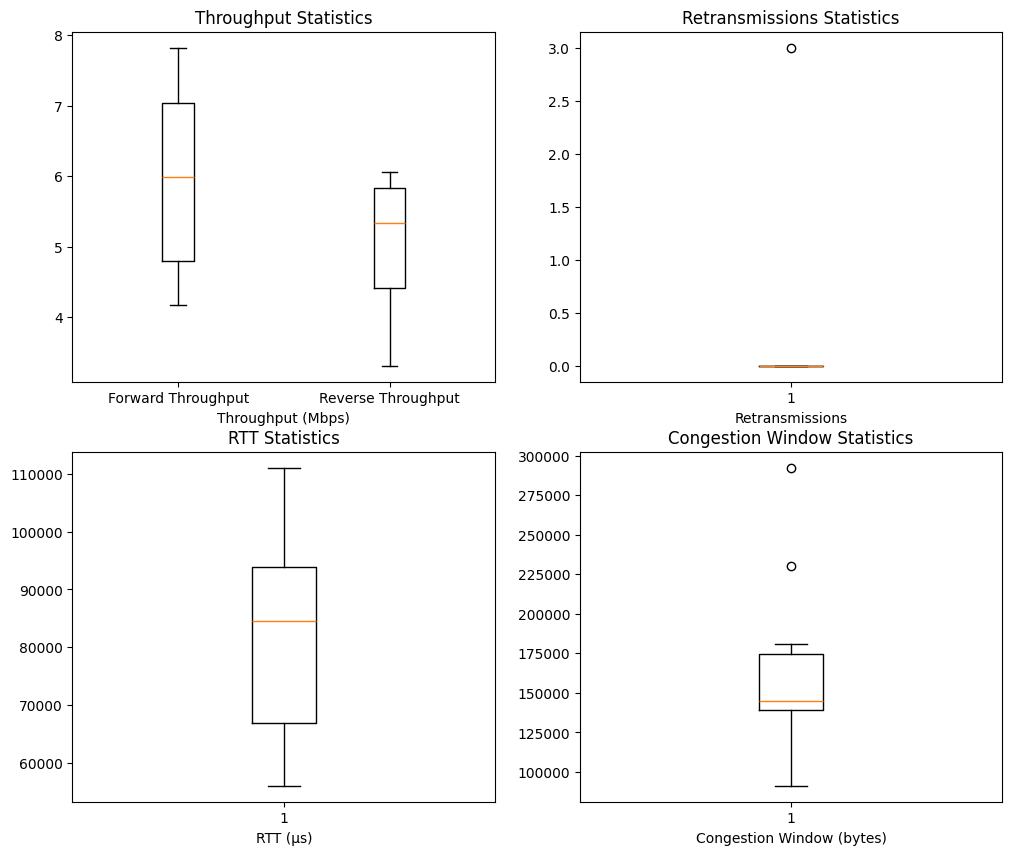

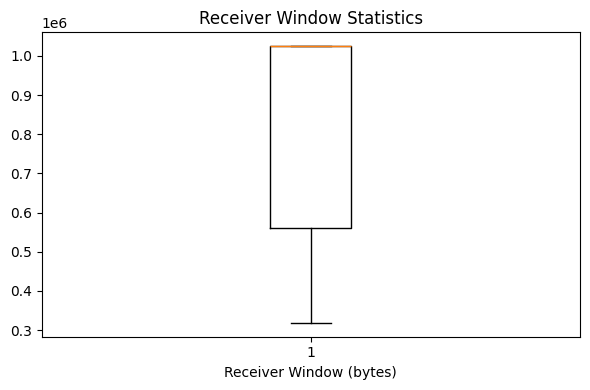

In [276]:
import json
import statistics
import matplotlib.pyplot as plt

# Load the JSON data
with open('test.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [throughputs, reverse_throughputs]
throughput_labels = ['Forward Throughput', 'Reverse Throughput']

# plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.boxplot(throughput_stats, labels=throughput_labels)
plt.xlabel('Throughput (Mbps)')
plt.title('Throughput Statistics')
# plt.show()

# Retransmissions Statistics
# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
plt.boxplot(retransmits)
plt.xlabel('Retransmissions')
plt.title('Retransmissions Statistics')
# plt.show()

# RTT Statistics
# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.boxplot(rtts)
plt.xlabel('RTT (μs)')
plt.title('RTT Statistics')
# plt.show()

# Congestion Window Statistics
# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
plt.boxplot(cwnds)
plt.xlabel('Congestion Window (bytes)')
plt.title('Congestion Window Statistics')
# plt.show()

# Receiver Window Statistics
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(6, 4))

plt.boxplot(rwnds)
plt.xlabel('Receiver Window (bytes)')
plt.title('Receiver Window Statistics')
# plt.show()
plt.tight_layout()
plt.show()

In [267]:
# import json
# import statistics
# import matplotlib.pyplot as plt

# # # Load the JSON data
# # with open('test.json') as f:
# #     data = json.load(f)

# # Extract relevant data
# intervals = data['intervals']
# num_intervals = len(intervals)
# timestamps = [interval['sum']['end'] for interval in intervals]
# throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# rtts = [interval['streams'][0]['rtt'] for interval in intervals]
# jitters = [interval['streams'][0]['rttvar'] for interval in intervals]

# # Latency (RTT)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, rtts)
# plt.xlabel('Time (s)')
# plt.ylabel('RTT (μs)')
# plt.title('Latency (Round-Trip Time)')
# plt.show()

# # Throughput
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, throughputs, label='Forward Throughput')
# plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
# plt.xlabel('Time (s)')
# plt.ylabel('Throughput (Mbps)')
# plt.title('Throughput')
# plt.legend()
# plt.show()

# # Jitter
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, jitters)
# plt.xlabel('Time (s)')
# plt.ylabel('Jitter (μs)')
# plt.title('Jitter')
# plt.show()

# # Connectivity
# connected_hosts = set()
# for interval in data['intervals']:
#     for stream in interval['streams']:
#         if 'local_host' in stream and 'remote_host' in stream:
#             connected_hosts.add((stream['local_host'], stream['remote_host']))

# print("Connected Hosts:")
# for local_host, remote_host in connected_hosts:
#     print(f"Local Host: {local_host}, Remote Host: {remote_host}")

['data/pi1/ping0.json', 'data/pi1/ping1.json', 'data/pi1/ping2.json', 'data/pi1/iperf0.json', 'data/pi1/iperf1.json', 'data/pi1/ping3.json']


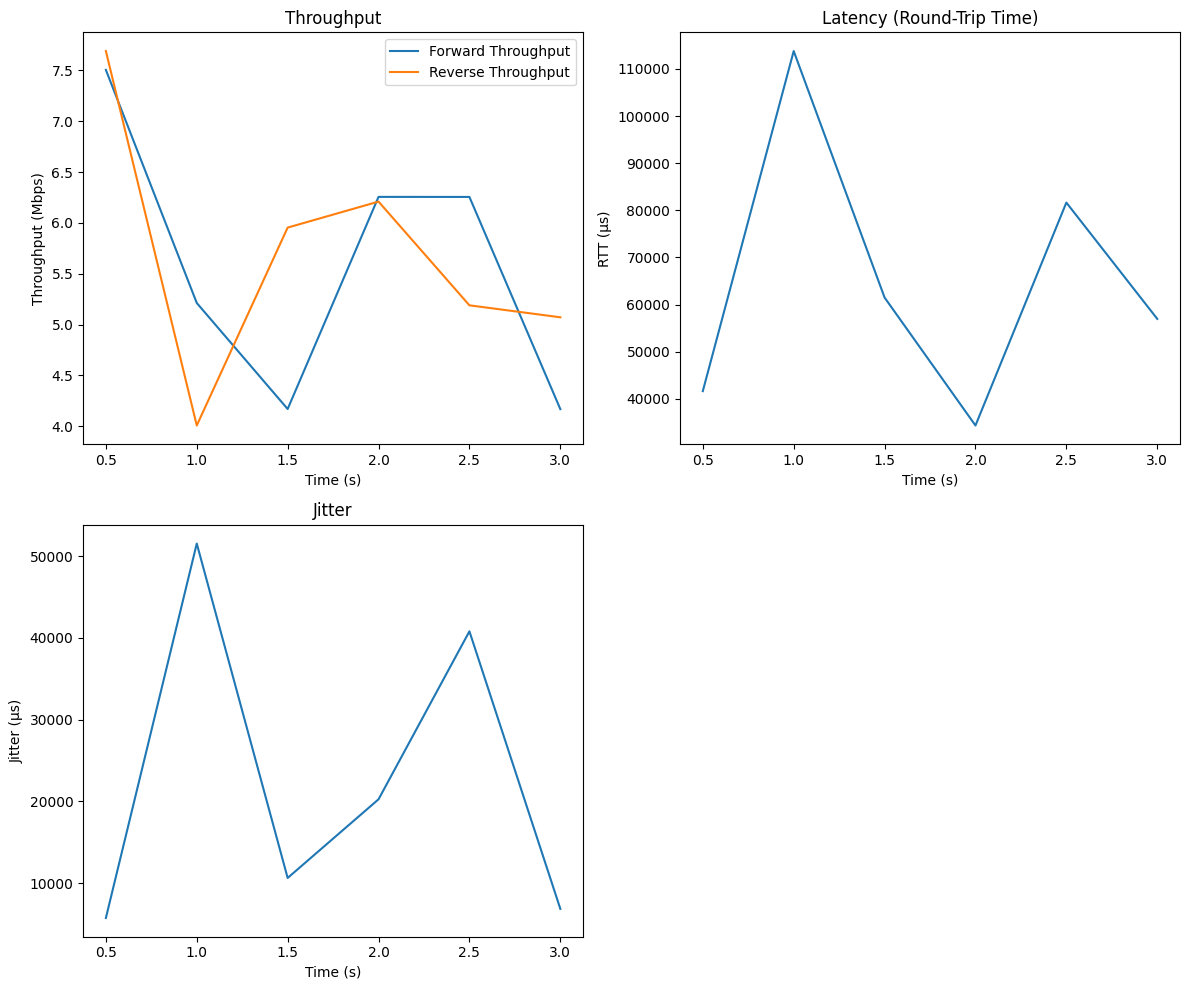

Throughput Statistics (Mbps):
Mean Forward Throughput: 5.59
Median Forward Throughput: 5.73
Max Forward Throughput: 7.50
Min Forward Throughput: 4.17
Standard Deviation Forward Throughput: 1.32
Mean Reverse Throughput: 5.69
Median Reverse Throughput: 5.57
Max Reverse Throughput: 7.69
Min Reverse Throughput: 4.01
Standard Deviation Reverse Throughput: 1.25


In [275]:
import json
import statistics
import matplotlib.pyplot as plt
import glob

# List of JSON files
json_files = glob.glob('data/pi1/*.json')
print(json_files)

# Initialize lists to store data
# all_timestamps = []
# all_throughputs = []
# all_reverse_throughputs = []
# all_rtts = []
# all_jitters = []

# Iterate over JSON files and extract data
for json_file in json_files:
    if "perf" in json_file:
        with open(json_file) as f:
            data = json.load(f)

        intervals = data['intervals']
        timestamps = [interval['sum']['end'] for interval in intervals]
        throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
        reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
        rtts = [interval['streams'][0]['rtt'] for interval in intervals]
        jitters = [interval['streams'][0]['rttvar'] for interval in intervals]

        # all_timestamps.extend(timestamps)
        # all_throughputs.extend(throughputs)
        # all_reverse_throughputs.extend(reverse_throughputs)
        # all_rtts.extend(rtts)
        # all_jitters.extend(jitters)

# Data analysis and visualization
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
# plt.figure(figsize=(12, 6))
plt.plot(timestamps, throughputs, label='Forward Throughput')
plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
# plt.show()

# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
plt.plot(timestamps, rtts)
plt.xlabel('Time (s)')
plt.ylabel('RTT (μs)')
plt.title('Latency (Round-Trip Time)')
# plt.show()

# plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.plot(timestamps, jitters)
plt.xlabel('Time (s)')
plt.ylabel('Jitter (μs)')
plt.title('Jitter')
# plt.show()
plt.tight_layout()
plt.show()

# Throughput statistics
print("Throughput Statistics (Mbps):")
print(f"Mean Forward Throughput: {statistics.mean(throughputs):.2f}")
print(f"Median Forward Throughput: {statistics.median(throughputs):.2f}")
print(f"Max Forward Throughput: {max(throughputs):.2f}")
print(f"Min Forward Throughput: {min(throughputs):.2f}")
print(f"Standard Deviation Forward Throughput: {statistics.stdev(throughputs):.2f}")
print(f"Mean Reverse Throughput: {statistics.mean(reverse_throughputs):.2f}")
print(f"Median Reverse Throughput: {statistics.median(reverse_throughputs):.2f}")
print(f"Max Reverse Throughput: {max(reverse_throughputs):.2f}")
print(f"Min Reverse Throughput: {min(reverse_throughputs):.2f}")
print(f"Standard Deviation Reverse Throughput: {statistics.stdev(reverse_throughputs):.2f}")

#draw topology

In [15]:
import json

def read_batman_topology(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print("File not found.")
        return None
    except json.JSONDecodeError:
        print("Invalid JSON format.")
        return None

# Example usage:
file_path = './topology.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    print("BATMAN Topology:")
    print(batman_topology)


BATMAN Topology:
{'source_version': 'debian-2023.0-1', 'algorithm': 4, 'vis': [{'primary': 'b8:27:eb:43:8e:82', 'neighbors': [{'router': 'b8:27:eb:43:8e:82', 'neighbor': 'd8:3a:dd:f5:1f:14', 'metric': '1.308'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:49', 'metric': '1.143'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:3a', 'metric': '1.378'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:51', 'metric': '1.067'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:d0', 'metric': '1.244'}], 'clients': ['33:33:ff:d2:7f:5f', '33:33:00:00:00:fb', '01:00:5e:00:00:01', '01:00:5e:00:00:fb', 'd6:56:90:d2:7f:5f', '33:33:00:00:00:01']}]}


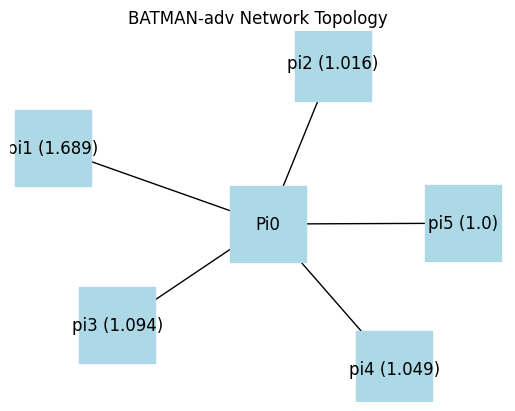

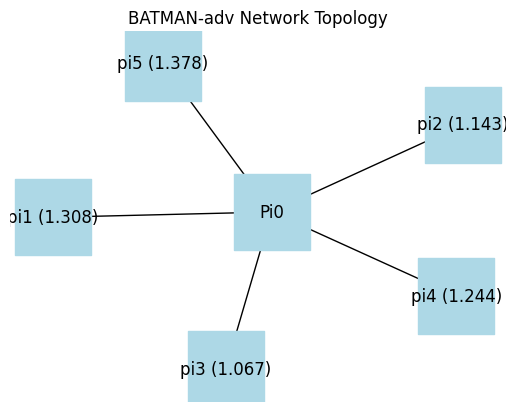

In [200]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def read_batman_topology(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print("File not found.")
        return None
    except json.JSONDecodeError:
        print("Invalid JSON format.")
        return None

def draw_batman_topology(batman_topology, mac_to_name):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for primary router and clients
    primary_router = batman_topology['vis'][0]['primary']
    clients = batman_topology['vis'][0]['clients']
    G.add_node(primary_router, type='router', label=mac_to_name.get(primary_router, 'Pi0'))
    # for client in clients:
        # G.add_node(client, type='client', label=mac_to_name.get(client, 'Client'))

    # Add edges for neighbors with their metrics
    neighbors = batman_topology['vis'][0]['neighbors']
    for neighbor in neighbors:
        router = neighbor['router']
        neighbor_mac = neighbor['neighbor']
        metric = float(neighbor['metric'])
        G.add_node(neighbor_mac, type='router', label=f"{mac_to_name.get(neighbor_mac, 'Neighbor')} ({metric})")
        G.add_edge(router, neighbor_mac)

    # Draw the graph
    pos = nx.spring_layout(G)  # Set positions of nodes
    node_labels = nx.get_node_attributes(G, 'label')

    # Draw nodes as rectangles (squares)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_shape='s', node_size=3000)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw_networkx_edges(G, pos)

    plt.title('BATMAN-adv Network Topology')
    plt.axis('off')  # Turn off axis
    plt.show()

# Mapping of MAC addresses to names
mac_to_name = {
    '2c:cf:67:26:66:d0': 'pi4',
    '2c:cf:67:26:66:49': 'pi2',
    '2c:cf:67:26:66:3a': 'pi5',
    'd8:3a:dd:f5:1f:14': 'pi1',
    '2c:cf:67:26:66:51': 'pi3'
}

# Example usage:
file_path = './topology.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    draw_batman_topology(batman_topology, mac_to_name)

    # Example usage:
file_path = './topology2.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    draw_batman_topology(batman_topology, mac_to_name)


In [40]:
import re
import json

reference_string = '''
 172.27.0.1 
172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1
172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089
172.27.0.2 : xmt/rcv/%loss = 5/0/100%
172.27.0.3 : xmt/rcv/%loss = 5/0/100%
172.27.0.4 : xmt/rcv/%loss = 5/0/100%
172.27.0.5 : xmt/rcv/%loss = 5/0/100%
'''
print("REFERENCE")
print(reference_string)

data = reference_string.split("\n")[2:]
print(data)
# get unique ip addresses 
ips = set()
for i in range(len(data)):
    if len(data[i]) > 0:
        ips.add(data[i].split()[0])

print("DATA: ", data)
# remove empty strings
for i in range(len(data)):
    if len(data[i]) == 0:
        data.pop(i)
for d in data: 
    ip,xmt,rcv,loss,min,avg,max =None, None, None, None, None, None, None
    # fill array with -1 
    populated_arr = [-1,-1,-1,-1,-1,-1,-1]
    d = d.strip()
    # remove all spaces
    d = d.replace(" ", "")
    # if " min/avg/max = " in d:
    d = d.replace ("min/avg/max=", "")
    d = d.replace("%", "")
    d=d.replace(":", "")
    d = d.replace("xmt/rcv/loss=", ",")
    d = d.replace("/", ",") 
    d = d.split(",")
    for i in range(len(d)):
        populated_arr[i] = d[i]
    print(populated_arr)
    






REFERENCE

 172.27.0.1 
172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1
172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089
172.27.0.2 : xmt/rcv/%loss = 5/0/100%
172.27.0.3 : xmt/rcv/%loss = 5/0/100%
172.27.0.4 : xmt/rcv/%loss = 5/0/100%
172.27.0.5 : xmt/rcv/%loss = 5/0/100%

['172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1', '172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089', '172.27.0.2 : xmt/rcv/%loss = 5/0/100%', '172.27.0.3 : xmt/rcv/%loss = 5/0/100%', '172.27.0.4 : xmt/rcv/%loss = 5/0/100%', '172.27.0.5 : xmt/rcv/%loss = 5/0/100%', '']
DATA:  ['172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1', '172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089', '172.27.0.2 : xmt/rcv/%loss = 5/0/100%', '172.27.0.3 : xmt/rcv/%loss = 5/0/100%', '172.27.0.4 : xmt/rcv/%loss = 5/0/100%', '172.27.0.5 : xmt/rcv/%loss = 5/0/100%', '']
D:  ['172.27.0.0', '5', '5', '0', '1.83', '17.9', '56.1']
['1

# Data collection methodology & plan

In [ ]:
# data collected from fping:
# 172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.099/0.111/0.134
# xmt is the number of packets sent
# rcv is the number of packets received
# loss is the percentage of packets lost
# min is the minimum round-trip time (RTT) in milliseconds
# avg is the average RTT in milliseconds
# max is the maximum RTT in milliseconds





# Fully connected: every node is connected to every other node
# Star: all nodes are connected to a central node
# Pairs: two nodes will move together(simulating fire fighters moving in pairs)
# We will examine static and dynamic topologies

# for [STATIC, DYNAMIC]: ## Analyze the impact of mobility on performance
    # for [BATMAN, and OLSR]: ## Compare the performance of BATMAN and OLSR
        # for [MESH, LINE, PAIRS]: ## Analyze the impact of network topology on performance
            # for [3, 5 NODES]: ## Analyze Scalability 
                # 1. Collect data from fping and iperf
                    # - fping: min, max, avg round-trip time (RTT) and packet loss to each node in the network
                    # - iperf: throughput, rtx, RTT, congestion window, receiver window, CPU utilization to the base station, bandiwdth, jitter(rtt variance)
                # 2. Visualize the data using plots
                # 3. Calculate the following statistics:
                    # - Mean, Median, Max, Min, Standard Deviation for each metric
                    # - Box plots for each metric
                    # - CDF for each metric
                    # - Connectivity: which nodes are connected to which other nodes
    
    # new tesT: long term performance of the network
    # 1. Run iperf for an extended period of time    
    # 4. Visualize the network topology using the BATMAN-adv data
    # 5. Compare the performance of BATMAN-adv and OLSR
    # 6. Analyze the impact of network topology on performance
#  Analyze scalability 
# in real world networks, the topology rapidly changes, so by examing the performance of different routing protocols under different static topologies, we can gain insights into how they perform in real-world scenarios.
# we can examine how each topology migra

# using this data, we can calculate the following:


# ping data to every other node. 

# methodology: setting up a simple benchmark that performs back to back rtt measurements by sending and recieving 20 byte requsts and replies from the server 
# cdf of the mesarued rtts from the pixel to the linksys
# talk about complexities of not using iperf with several ports because of collisions 

./finalized_data/BATMAN/MESH/3/pi2/iperf0.json
Bandwidth data:
Interval 1: 0.741208471458687 Mbps
Interval 2: 1.8992783472538872 Mbps
Interval 3: 0.8803593374523757 Mbps
Interval 4: 2.8727227567787867 Mbps
Interval 5: 0.6950177955091957 Mbps
Interval 6: 2.617900363084637 Mbps
Interval 7: 0.7877419560646992 Mbps
Interval 8: 2.2473814628904654 Mbps
Interval 9: 0.0 Mbps
Interval 10: 1.807104 Mbps
Interval 11: 0.880325861566626 Mbps
Interval 12: 1.6216529028858901 Mbps
Jitter data:
Interval 1: 30.125 milliseconds
Interval 2: 22.304 milliseconds
Interval 3: 26.578 milliseconds
Interval 4: 64.48 milliseconds
Interval 5: 43.587 milliseconds
Interval 6: 25.232 milliseconds


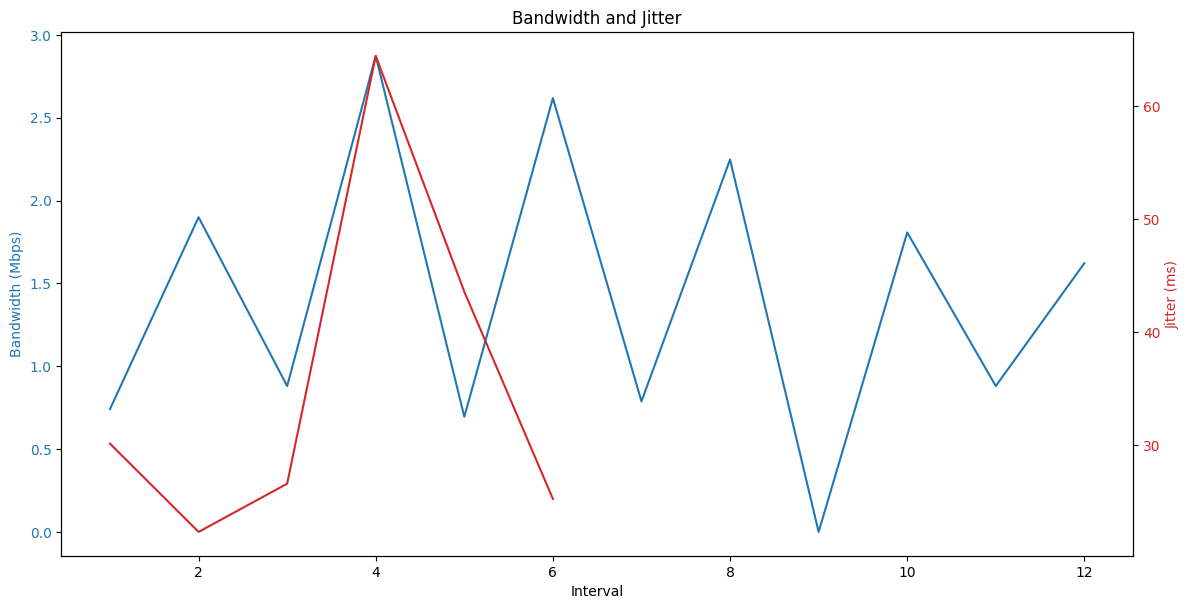

In [49]:
# load data from file 
data = "./finalized_data/BATMAN/MESH/3/pi2/iperf0.json"
# read file
with open(data) as f:
    json_data = json.load(f)
    print(data)
# data = 

# Parse the JSON
# json_data = json.loads(data)

# Initialize a list to store bandwidth data
bandwidth_data = []

# Iterate through intervals
for interval in json_data['intervals']:
    # Iterate through streams within the interval
    for stream in interval['streams']:
        # Extract the bits_per_second field
        bandwidth = stream['bits_per_second']
        # Append bandwidth to the list
        bandwidth_data.append(bandwidth)

# Print the extracted bandwidth data
print("Bandwidth data:")
for i, bandwidth in enumerate(bandwidth_data, start=1):
    # print(f"Interval {i}: {bandwidth} Mbps")
    # print Mbps
    print(f"Interval {i}: {bandwidth/1e6} Mbps")

# Parse the JSON
# json_data = json.loads(data)

# Initialize a list to store jitter data
jitter_data = []

# Iterate through intervals
for interval in json_data['intervals']:
    # Iterate through streams within the interval
    for stream in interval['streams']:
        # Check if the 'rttvar' field is present
        if 'rttvar' in stream:
            # Extract the jitter (RTTVAR) value
            jitter = stream['rttvar']
            # Append jitter to the list
            jitter_data.append(jitter)

# Print the extracted jitter data
print("Jitter data:")
#extract 
for i, jitter in enumerate(jitter_data, start=1):
    # print(f"Interval {i}: {jitter} microseconds")
    # turn to milliseconds
    print(f"Interval {i}: {jitter/1000} milliseconds")

# plot jitter and bandwidth on the same graph using two differnt y axes
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bandwidth data
ax1.set_xlabel('Interval')
ax1.set_ylabel('Bandwidth (Mbps)', color='tab:blue')
ax1.plot(range(1, len(bandwidth_data) + 1), [bw / 1e6 for bw in bandwidth_data], color='tab:blue', label='Bandwidth')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()
# Plot jitter data
ax2.set_ylabel('Jitter (ms)', color='tab:red')
ax2.plot(range(1, len(jitter_data) + 1), [jitter / 1000 for jitter in jitter_data], color='tab:red', label='Jitter')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a legend
fig.tight_layout()
plt.title('Bandwidth and Jitter')
plt.show()



## Data Initialization

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# List all JSON files in the current directory
json_files = [f for f in os.listdir('./data/pi1/') if f.endswith('.json') and "perf" in f]
more = [f for f in os.listdir('./data/pi2/') if f.endswith('.json') and "fping" in f]
for m in more:
    json_files.append(m)

# CDF Plotting, making this for longer iperf tests

In [264]:
print(json_files)

['iperf0.json', 'iperf1.json']


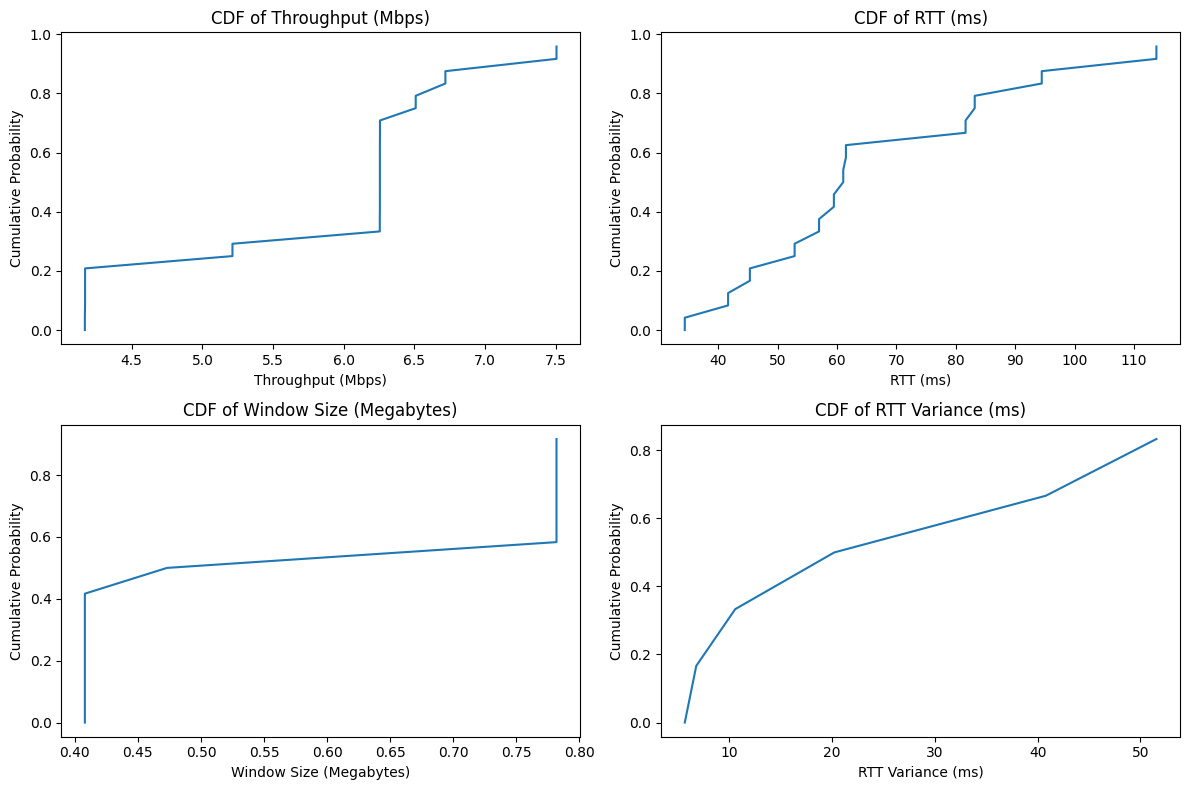

In [266]:

# # Initialize lists to store data from all files
# all_throughputs = []
# all_rtts = []
all_window_sizes = []

for json_file in json_files:
    # Load JSON data
    with open("./data/pi1/"+json_file) as f:
        data = json.load(f)

    # Extract interval data
    intervals = data['intervals']

    # Calculate throughput for each interval
    throughputs = []
    for interval in intervals:
        throughput = interval['sum']['bits_per_second'] / 1e6  # Mbps
        throughputs.append(throughput)
    all_throughputs.extend(throughputs)

    # Calculate RTT for each interval
    rtts = []
    for interval in intervals:
        if 'streams' in interval:
            for stream in interval['streams']:
                if 'rtt' in stream:
                    rtts.append(stream['rtt'])
    all_rtts.extend(rtts)

    # Calculate window size for each interval
    window_sizes = []
    for interval in intervals:
        if 'streams' in interval:
            for stream in interval['streams']:
                if 'snd_wnd' in stream:
                    window_sizes.append(stream['snd_wnd'])
    all_window_sizes.extend(window_sizes)

    # calculate rtt variance
    rtt_vars = []
    for interval in intervals:
        if 'streams' in interval:
            for stream in interval['streams']:
                if 'rttvar' in stream:
                    rtt_vars.append(stream['rttvar'])

# Create CDF plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("CDF of Throughput (Mbps)")
sorted_throughputs = np.sort(all_throughputs)
yvals = np.arange(len(sorted_throughputs)) / float(len(sorted_throughputs))
plt.plot(sorted_throughputs, yvals)
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Cumulative Probability")

plt.subplot(2, 2, 2)
plt.title("CDF of RTT (ms)")
sorted_rtts = np.sort(all_rtts)
# turn to milliseconds
sorted_rtts = [rtt/1000 for rtt in sorted_rtts]
yvals = np.arange(len(sorted_rtts)) / float(len(sorted_rtts))
plt.plot(sorted_rtts, yvals)
plt.xlabel("RTT (ms)")
plt.ylabel("Cumulative Probability")

plt.subplot(2, 2, 3)
plt.title("CDF of Window Size (Megabytes)")
# turn to megabytes
all_window_sizes = [window/1e6 for window in all_window_sizes]
sorted_window_sizes = np.sort(all_window_sizes)
yvals = np.arange(len(sorted_window_sizes)) / float(len(sorted_window_sizes))
plt.plot(sorted_window_sizes, yvals)
plt.xlabel("Window Size (Megabytes)")
plt.ylabel("Cumulative Probability")

plt.subplot(2, 2, 4)
plt.title("CDF of RTT Variance (ms)")
sorted_rtt_vars = np.sort(rtt_vars)
# turn to milliseconds
sorted_rtt_vars = [rtt_var/1000 for rtt_var in sorted_rtt_vars]
yvals = np.arange(len(sorted_rtt_vars)) / float(len(sorted_rtt_vars))
plt.plot(sorted_rtt_vars, yvals)
plt.xlabel("RTT Variance (ms)")
plt.ylabel("Cumulative Probability")



plt.tight_layout()
plt.show()

['iperf0.json', 'iperf1.json']


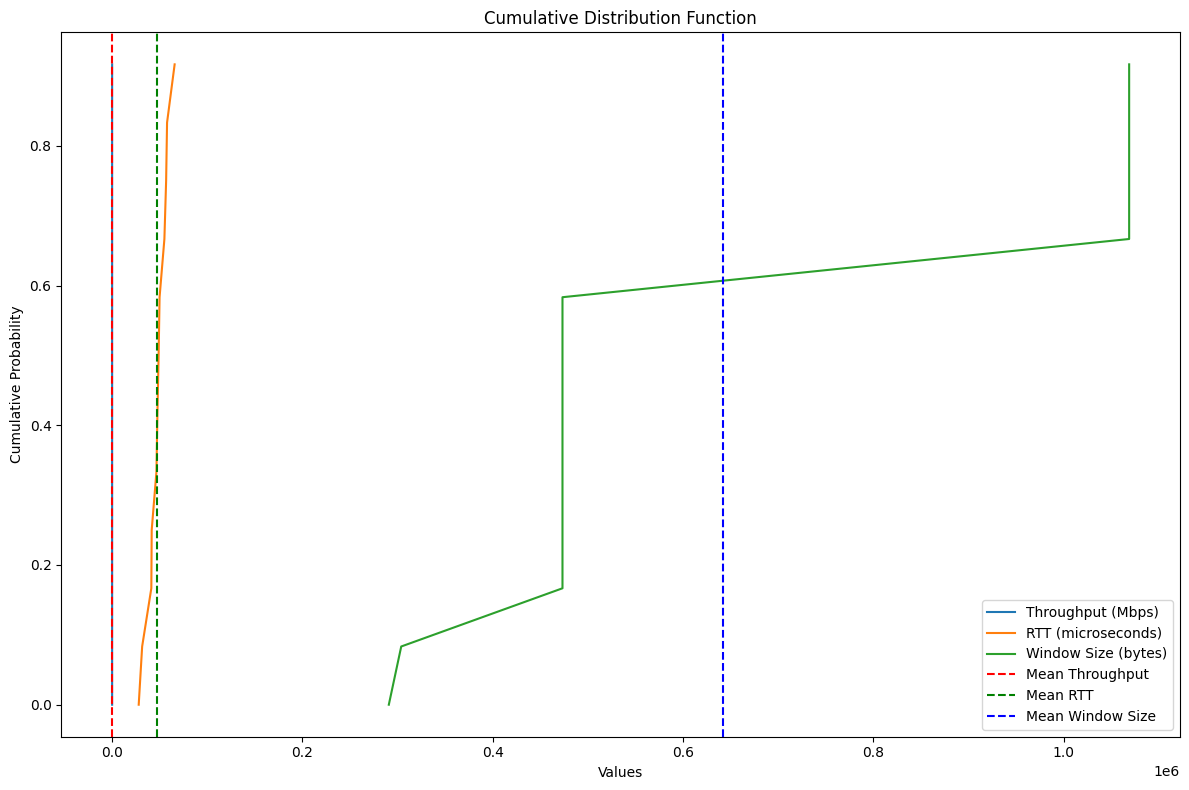

In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# List all JSON files in the current directory
# json_files = [f for f in os.listdir('.') if f.endswith('.json')]

# Initialize lists to store data from all files
all_throughputs = []
all_rtts = []
all_window_sizes = []
print(json_files)
for json_file in json_files:
    # Load JSON data
    with open("./data/pi2/"+json_file) as f:
        if "perf" in json_file:
            data = json.load(f)
        # data = json.load(f)

    # Extract interval data
    intervals = data['intervals']

    # Calculate throughput for each interval
    throughputs = []
    for interval in intervals:
        throughput = interval['sum']['bits_per_second'] / 1e6  # Mbps
        throughputs.append(throughput)
    all_throughputs.extend(throughputs)

    # Calculate RTT for each interval
    rtts = []
    for interval in intervals:
        if 'streams' in interval:
            for stream in interval['streams']:
                if 'rtt' in stream:
                    rtts.append(stream['rtt'])
    all_rtts.extend(rtts)

    # Calculate window size for each interval
    window_sizes = []
    for interval in intervals:
        if 'streams' in interval:
            for stream in interval['streams']:
                if 'snd_wnd' in stream:
                    window_sizes.append(stream['snd_wnd'])
    all_window_sizes.extend(window_sizes)

# Create CDF plot
plt.figure(figsize=(12, 8))

# Throughput CDF
sorted_throughputs = np.sort(all_throughputs)
yvals = np.arange(len(sorted_throughputs)) / float(len(sorted_throughputs))
plt.plot(sorted_throughputs, yvals, label="Throughput (Mbps)")

# RTT CDF
sorted_rtts = np.sort(all_rtts)
yvals = np.arange(len(sorted_rtts)) / float(len(sorted_rtts))
plt.plot(sorted_rtts, yvals, label="RTT (microseconds)")

# Window Size CDF
sorted_window_sizes = np.sort(all_window_sizes)
yvals = np.arange(len(sorted_window_sizes)) / float(len(sorted_window_sizes))
plt.plot(sorted_window_sizes, yvals, label="Window Size (bytes)")

# plot average throughput of all files
plt.axvline(x=np.mean(all_throughputs), color='r', linestyle='--', label='Mean Throughput')
plt.axvline(x=np.mean(all_rtts), color='g', linestyle='--', label='Mean RTT')
plt.axvline(x=np.mean(all_window_sizes), color='b', linestyle='--', label='Mean Window Size')


plt.title("Cumulative Distribution Function")
plt.xlabel("Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.tight_layout()
plt.show()

# make a second chart comparing this  chart 

# Ping Data Analytics Attempt #1

In [248]:
# import os
# import json
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to load data from JSON files
# def load_data(folder_path):
#     iperf_data = None
#     ping_data = None
#     for file in os.listdir(folder_path):
#         if file.startswith("iperf"):
#             with open(os.path.join(folder_path, file), 'r') as f:
#                 iperf_data = json.load(f)
#         elif file.startswith("ping"):
#             with open(os.path.join(folder_path, file), 'r') as f:
#                 ping_data = json.load(f)
#     return iperf_data, ping_data

# # Function to visualize data
# def visualize_data(iperf_data, ping_data, folder_path):
#     # Example: Plot RTT from ping_data
#     rtt_data = ping_data['rtt']
#     plt.plot(range(len(rtt_data)), rtt_data, label='RTT')
#     plt.xlabel('Node')
#     plt.ylabel('RTT (ms)')
#     plt.title('Round Trip Time (RTT) for each Node')
#     plt.legend()
#     plt.show()

#     # Perform similar plotting for other metrics and data types

# # Function to perform statistical analysis
# def analyze_data(iperf_data, ping_data):
#     # Example: Calculate mean, median, max, min, and standard deviation for RTT
#     rtt_data = ping_data['rtt']
#     rtt_mean = np.mean(rtt_data)
#     rtt_median = np.median(rtt_data)
#     rtt_max = np.max(rtt_data)
#     rtt_min = np.min(rtt_data)
#     rtt_std = np.std(rtt_data)
#     print("RTT Statistics:")
#     print("Mean:", rtt_mean)
#     print("Median:", rtt_median)
#     print("Max:", rtt_max)
#     print("Min:", rtt_min)
#     print("Standard Deviation:", rtt_std)

#     # Perform similar analysis for other metrics

# # Main function
# def main(root_folder):
#     # for mobility in ['STATIC', 'DYNAMIC']:
#         # for routing_protocol in ['BATMAN', 'OLSR']:
#         for routing_protocol in ['BATMAN']:
#             # for topology in ['LINE', 'MESH', 'PAIR']:
#             for topology in ['MESH', 'PAIR']:
#                 for num_nodes in ['3', '6']:
#                     # folder_path = os.path.join(root_folder, mobility, routing_protocol, topology, num_nodes, 'PI2')
#                     folder_path = os.path.join(root_folder, routing_protocol, topology, num_nodes, 'pi2')
#                     if os.path.exists(folder_path):
#                         print("Processing data in:", folder_path)
#                         iperf_data, ping_data = load_data(folder_path)
#                         if iperf_data and ping_data:
#                             visualize_data(iperf_data, ping_data, folder_path)
#                             analyze_data(iperf_data, ping_data)

# # Define the root folder
# root_folder = './finalized_data/'  # Change this to your root folder

# # Call the main function
# main(root_folder)


Processing data in: ./finalized_data/BATMAN/MESH/3/pi2


KeyError: 'rtt'

# Ping Data Analytics Attempt #2

Processing data in: ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2


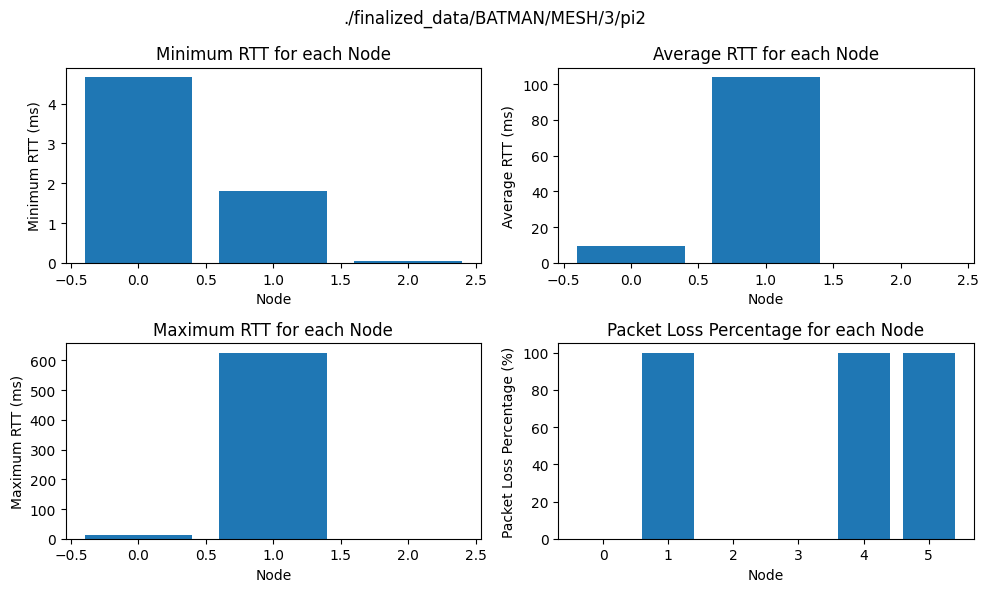

RTT Statistics for Ping Data:
Mean - Minimum RTT: 2.175666666666667
Mean - Average RTT: 37.821999999999996
Mean - Maximum RTT: 213.354
Mean - Packet Loss Percentage: 50.0
Median - Minimum RTT: 1.81
Median - Average RTT: 9.41
Median - Maximum RTT: 14.0
Median - Packet Loss Percentage: 50.0
Processing data in: ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2


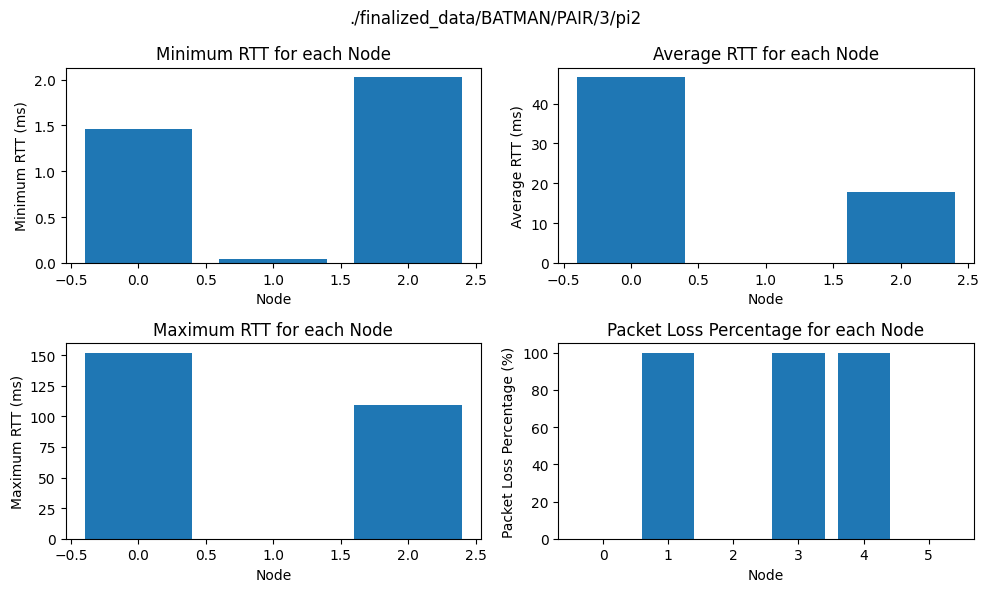

RTT Statistics for Ping Data:
Mean - Minimum RTT: 1.179
Mean - Average RTT: 21.550666666666668
Mean - Maximum RTT: 87.02333333333333
Mean - Packet Loss Percentage: 50.0
Median - Minimum RTT: 1.46
Median - Average RTT: 17.9
Median - Maximum RTT: 109.0
Median - Packet Loss Percentage: 50.0


In [79]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to load data from JSON files
def load_data(folder_path):
    iperf_data = None
    ping_data = None
    for file in os.listdir(folder_path):
        print("searching for files in: ", folder_path)
        if file.startswith("iperf"):
            with open(os.path.join(folder_path, file), 'r') as f:
                iperf_data = json.load(f)
        elif file.startswith("ping"):
            with open(os.path.join(folder_path, file), 'r') as f:
                ping_data = json.load(f)
    return iperf_data, ping_data

# Function to visualize data
def visualize_data(ping_data, folder_path):
    # Plot ping metrics for each node
    ips = ping_data['ips']
    data = ping_data['data']

    # Extracting data
    min_rtts = []
    avg_rtts = []
    max_rtts = []
    packet_loss_percentages = []

    for ip in ips:
        ip_data = data[ip]
        packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

        if min_rtt != -1:
            min_rtts.append(float(min_rtt))
        if avg_rtt != -1:
            avg_rtts.append(float(avg_rtt))
        if max_rtt != -1:
            max_rtts.append(float(max_rtt))
        packet_loss_percentages.append(float(packet_loss))

    # Plotting
    plt.figure(figsize=(10, 6))
    # title it with the folder path
    plt.suptitle(folder_path)

    plt.subplot(2, 2, 1)
    plt.bar(range(len(min_rtts)), min_rtts)
    plt.xlabel('Node')
    plt.ylabel('Minimum RTT (ms)')
    plt.title('Minimum RTT for each Node')

    plt.subplot(2, 2, 2)
    plt.bar(range(len(avg_rtts)), avg_rtts)
    plt.xlabel('Node')
    plt.ylabel('Average RTT (ms)')
    plt.title('Average RTT for each Node')

    plt.subplot(2, 2, 3)
    plt.bar(range(len(max_rtts)), max_rtts)
    plt.xlabel('Node')
    plt.ylabel('Maximum RTT (ms)')
    plt.title('Maximum RTT for each Node')

    plt.subplot(2, 2, 4)
    plt.bar(range(len(packet_loss_percentages)), packet_loss_percentages)
    plt.xlabel('Node')
    plt.ylabel('Packet Loss Percentage (%)')
    plt.title('Packet Loss Percentage for each Node')

    plt.tight_layout()
    plt.show()

# Function to perform statistical analysis
def analyze_data(ping_data):
    # Extract ping data
    ips = ping_data['ips']
    data = ping_data['data']

    # Extracting data
    min_rtts = []
    avg_rtts = []
    max_rtts = []
    packet_loss_percentages = []

    for ip in ips:
        ip_data = data[ip]
        packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

        if min_rtt != -1:
            min_rtts.append(float(min_rtt))
        if avg_rtt != -1:
            avg_rtts.append(float(avg_rtt))
        if max_rtt != -1:
            max_rtts.append(float(max_rtt))
        packet_loss_percentages.append(float(packet_loss))

    # Calculate statistics
    min_rtt_mean = np.mean(min_rtts)
    avg_rtt_mean = np.mean(avg_rtts)
    max_rtt_mean = np.mean(max_rtts)
    packet_loss_mean = np.mean(packet_loss_percentages)

    min_rtt_median = np.median(min_rtts)
    avg_rtt_median = np.median(avg_rtts)
    max_rtt_median = np.median(max_rtts)
    packet_loss_median = np.median(packet_loss_percentages)

    print("RTT Statistics for Ping Data:")
    # print('STATS FOR PING DATA IN:', folder_path)
    print("Mean - Minimum RTT:", min_rtt_mean)
    print("Mean - Average RTT:", avg_rtt_mean)
    print("Mean - Maximum RTT:", max_rtt_mean)
    print("Mean - Packet Loss Percentage:", packet_loss_mean)
    print("Median - Minimum RTT:", min_rtt_median)
    print("Median - Average RTT:", avg_rtt_median)
    print("Median - Maximum RTT:", max_rtt_median)
    print("Median - Packet Loss Percentage:", packet_loss_median)

# # Main function
# def main(root_folder):
#     for mobility in ['STATIC', 'DYNAMIC']:
#         for routing_protocol in ['BATMAN', 'OLSR']:
#             for topology in ['STAR', 'LINE', 'PAIRS']:
#                 for num_nodes in ['3', '6']:
#                     folder_path = os.path.join(root_folder, mobility, routing_protocol, topology, num_nodes, 'PI2')
#                     if os.path.exists(folder_path):
#                         iperf_data, ping_data = load_data(folder_path)
#                         if iperf_data and ping_data:
#                             visualize_data(ping_data, folder_path)
#                             analyze_data(ping_data)

def main(root_folder):
    # for mobility in ['STATIC', 'DYNAMIC']:
        # for routing_protocol in ['BATMAN', 'OLSR']:
        for routing_protocol in ['BATMAN']:
            # for topology in ['LINE', 'MESH', 'PAIR']:
            for topology in ['MESH', 'PAIR']:
                for num_nodes in ['3', '6']:
                    # folder_path = os.path.join(root_folder, mobility, routing_protocol, topology, num_nodes, 'PI2')
                    folder_path = os.path.join(root_folder, routing_protocol, topology, num_nodes, 'pi2')
                    if os.path.exists(folder_path):
                        print("Processing data in:", folder_path)
                        iperf_data, ping_data = load_data(folder_path)
                        if iperf_data and ping_data:
                            visualize_data(ping_data, folder_path)

                            # visualize_data(iperf_data, ping_data, folder_path)
                            # analyze_data(iperf_data, ping_data)
                            analyze_data(ping_data)


# Define the root folder
# root_folder = 'STATIC'  # Change this to your root folder
root_folder = './finalized_data/'  # Change this to your root folder

# Call the main function
main(root_folder)


# Ping Data Analytics Attempt #3

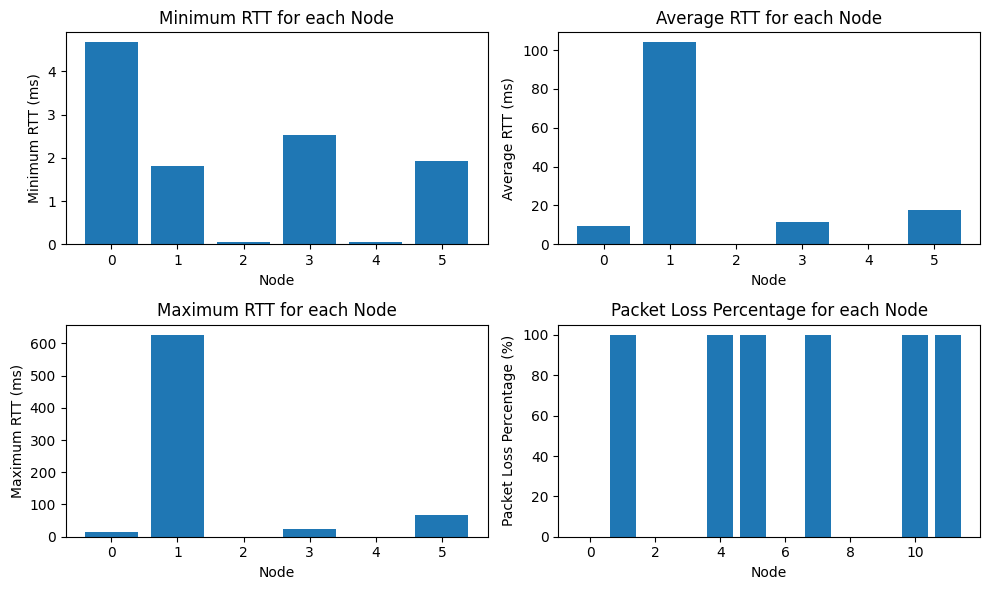

In [55]:
def visualize_data(folder_paths):
    # Initialize lists to store data from both folders
    all_min_rtts = []
    all_avg_rtts = []
    all_max_rtts = []
    all_packet_loss_percentages = []

    # Iterate through each folder path
    for folder_path in folder_paths:
        # Load data from the folder
        iperf_data, ping_data = load_data(folder_path)

        # Plot ping metrics for each node
        ips = ping_data['ips']
        data = ping_data['data']

        # Extracting data
        min_rtts = []
        avg_rtts = []
        max_rtts = []
        packet_loss_percentages = []

        for ip in ips:
            ip_data = data[ip]
            packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

            if min_rtt != -1:
                min_rtts.append(float(min_rtt))
            if avg_rtt != -1:
                avg_rtts.append(float(avg_rtt))
            if max_rtt != -1:
                max_rtts.append(float(max_rtt))
            packet_loss_percentages.append(float(packet_loss))

        # Append data to the lists
        all_min_rtts.append(min_rtts)
        all_avg_rtts.append(avg_rtts)
        all_max_rtts.append(max_rtts)
        all_packet_loss_percentages.append(packet_loss_percentages)

    # Combine data from both folders
    combined_min_rtts = np.concatenate(all_min_rtts)
    combined_avg_rtts = np.concatenate(all_avg_rtts)
    combined_max_rtts = np.concatenate(all_max_rtts)
    combined_packet_loss_percentages = np.concatenate(all_packet_loss_percentages)

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.bar(range(len(combined_min_rtts)), combined_min_rtts)
    plt.xlabel('Node')
    plt.ylabel('Minimum RTT (ms)')
    plt.title('Minimum RTT for each Node')

    plt.subplot(2, 2, 2)
    plt.bar(range(len(combined_avg_rtts)), combined_avg_rtts)
    plt.xlabel('Node')
    plt.ylabel('Average RTT (ms)')
    plt.title('Average RTT for each Node')

    plt.subplot(2, 2, 3)
    plt.bar(range(len(combined_max_rtts)), combined_max_rtts)
    plt.xlabel('Node')
    plt.ylabel('Maximum RTT (ms)')
    plt.title('Maximum RTT for each Node')

    plt.subplot(2, 2, 4)
    plt.bar(range(len(combined_packet_loss_percentages)), combined_packet_loss_percentages)
    plt.xlabel('Node')
    plt.ylabel('Packet Loss Percentage (%)')
    plt.title('Packet Loss Percentage for each Node')

    plt.tight_layout()
    plt.show()

# Modify main function to pass both folder paths
def main(root_folder):
    folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2'),
        os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi3')
    ]
    visualize_data(folder_paths)

# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)


In [57]:
def visualize_data(folder_paths):
    # Iterate through each folder path
    for folder_path in folder_paths:
        # Plot ping metrics for each node
        iperf_data, ping_data = load_data(folder_path)
        if iperf_data and ping_data:
            ips = ping_data['ips']
            data = ping_data['data']

            # Extracting data
            min_rtts = []
            avg_rtts = []
            max_rtts = []
            packet_loss_percentages = []

            for ip in ips:
                ip_data = data[ip]
                packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

                if min_rtt != -1:
                    min_rtts.append(float(min_rtt))
                if avg_rtt != -1:
                    avg_rtts.append(float(avg_rtt))
                if max_rtt != -1:
                    max_rtts.append(float(max_rtt))
                packet_loss_percentages.append(float(packet_loss))

            # Plotting
            plt.figure(figsize=(10, 6))

            plt.subplot(2, 2, 1)
            plt.bar(range(len(min_rtts)), min_rtts)
            plt.xlabel('Node')
            plt.ylabel('Minimum RTT (ms)')
            plt.title('Minimum RTT for each Node')

            plt.subplot(2, 2, 2)
            plt.bar(range(len(avg_rtts)), avg_rtts)
            plt.xlabel('Node')
            plt.ylabel('Average RTT (ms)')
            plt.title('Average RTT for each Node')

            plt.subplot(2, 2, 3)
            plt.bar(range(len(max_rtts)), max_rtts)
            plt.xlabel('Node')
            plt.ylabel('Maximum RTT (ms)')
            plt.title('Maximum RTT for each Node')

            plt.subplot(2, 2, 4)
            plt.bar(range(len(packet_loss_percentages)), packet_loss_percentages)
            plt.xlabel('Node')
            plt.ylabel('Packet Loss Percentage (%)')
            plt.title('Packet Loss Percentage for each Node')

            plt.tight_layout()
            plt.show()

def main(root_folder):
    # for mobility in ['STATIC', 'DYNAMIC']:
        for routing_protocol in ['BATMAN', 'OLSR']:
            for topology in ['STAR', 'LINE', 'PAIRS']:
                for num_nodes in ['3', '6']:
                    folder_paths = [
                        os.path.join(root_folder,  routing_protocol, topology, num_nodes, 'pi2'),
                        os.path.join(root_folder,  routing_protocol, topology, num_nodes, 'pi3')
                    ]
                    for folder_path in folder_paths:
                        if os.path.exists(folder_path):
                            print("Processing data in:", folder_path)
                            visualize_data(folder_paths)

# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)


searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/BATMAN/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2
searching for files in:  ./finalized_data/OLSR/MESH/3/pi2


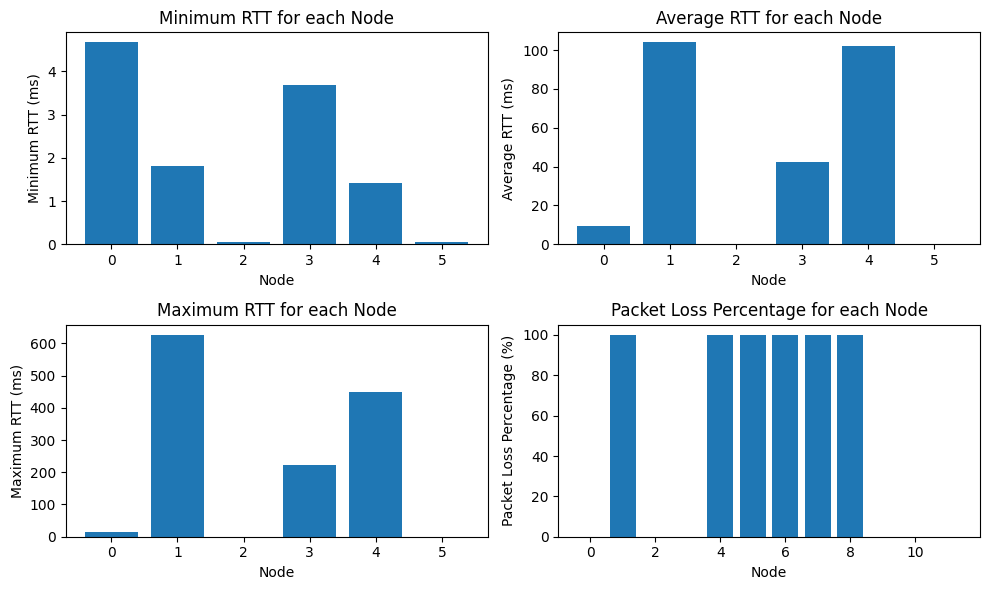

In [92]:
# compare the performance of BATMAN and OLSR by plotting the results of the iperf and ping tests for each routing protocol
# have them on a bar chart with the different metrics on the y axis and the routing protocols on the x axis
# have a separate chart for each metric

def visualize_data(folder_paths, preexisting_chart=False):
    # if preexisting_chart:
        # fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    # else:
        # plt.figure(figsize=(10, 6))
    # Initialize lists to store data from both folders
    all_min_rtts = []
    all_avg_rtts = []
    all_max_rtts = []
    all_packet_loss_percentages = []

    # Iterate through each folder path
    for folder_path in folder_paths:
        # Load data from the folder
        iperf_data, ping_data = load_data(folder_path)

        # Plot ping metrics for each node
        ips = ping_data['ips']
        data = ping_data['data']

        # Extracting data
        min_rtts = []
        avg_rtts = []
        max_rtts = []
        packet_loss_percentages = []

        for ip in ips:
            ip_data = data[ip]
            packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

            if min_rtt != -1:
                min_rtts.append(float(min_rtt))
            if avg_rtt != -1:
                avg_rtts.append(float(avg_rtt))
            if max_rtt != -1:
                max_rtts.append(float(max_rtt))
            packet_loss_percentages.append(float(packet_loss))

        # Append data to the lists
        all_min_rtts.append(min_rtts)
        all_avg_rtts.append(avg_rtts)
        all_max_rtts.append(max_rtts)
        all_packet_loss_percentages.append(packet_loss_percentages)

    # Combine data from both folders
    combined_min_rtts = np.concatenate(all_min_rtts)
    combined_avg_rtts = np.concatenate(all_avg_rtts)
    combined_max_rtts = np.concatenate(all_max_rtts)
    combined_packet_loss_percentages = np.concatenate(all_packet_loss_percentages)

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.bar(range(len(combined_min_rtts)), combined_min_rtts)
    plt.xlabel('Node')
    plt.ylabel('Minimum RTT (ms)')
    plt.title('Minimum RTT for each Node')

    plt.subplot(2, 2, 2)
    plt.bar(range(len(combined_avg_rtts)), combined_avg_rtts)
    plt.xlabel('Node')
    plt.ylabel('Average RTT (ms)')
    plt.title('Average RTT for each Node')

    plt.subplot(2, 2, 3)
    plt.bar(range(len(combined_max_rtts)), combined_max_rtts)

    plt.xlabel('Node')
    plt.ylabel('Maximum RTT (ms)')
    plt.title('Maximum RTT for each Node')

    plt.subplot(2, 2, 4)
    plt.bar(range(len(combined_packet_loss_percentages)), combined_packet_loss_percentages)
    plt.xlabel('Node')
    plt.ylabel('Packet Loss Percentage (%)')
    plt.title('Packet Loss Percentage for each Node')

    plt.tight_layout()
    plt.show()

# Modify main function to pass both folder paths
def main(root_folder):
    folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2'),
        os.path.join(root_folder, 'OLSR', 'MESH', '3', 'pi2')
    ]
    visualize_data(folder_paths)
    # visualize_data(folder_paths)
    
# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)

# Further Ping Analysis

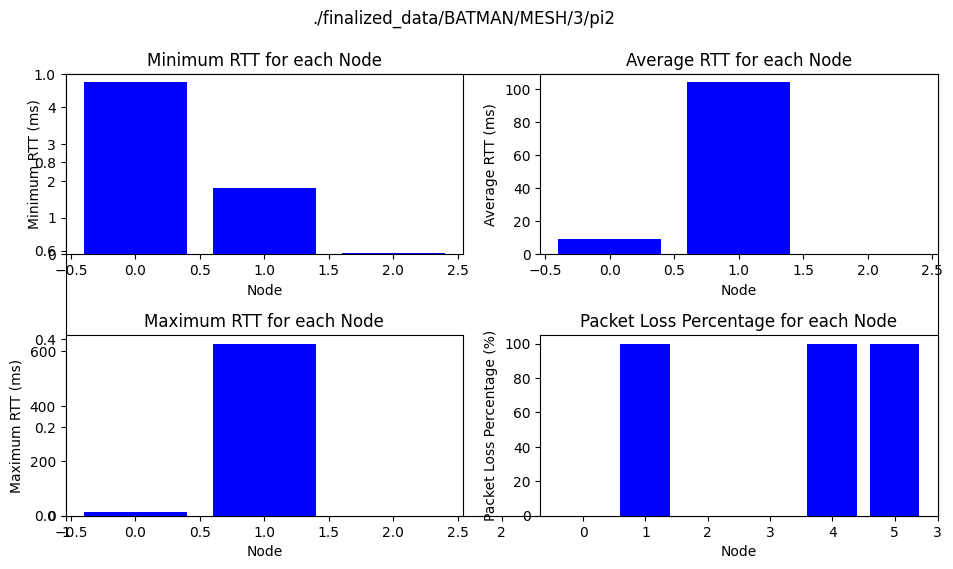

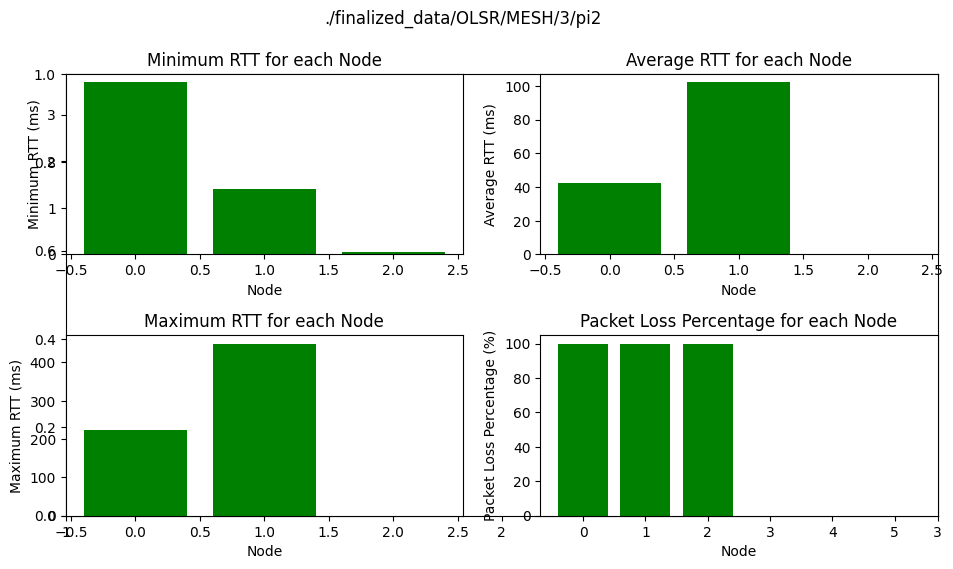

In [253]:
import os
import numpy as np
import matplotlib.pyplot as plt

# def load_data(folder_path):
#     # Implement loading data from folder_path
#     pass

def visualize_data(folder_paths, preexisting_chart=False):
    colors = ['blue', 'green']  # Colors for different routing protocols

    # Initialize lists to store data from both folders
    all_min_rtts = []
    all_avg_rtts = []
    all_max_rtts = []
    all_packet_loss_percentages = []

    # Iterate through each folder path and assign color
    for i, folder_path in enumerate(folder_paths):
        # Load data from the folder
        iperf_data, ping_data = load_data(folder_path)

        # Plot ping metrics for each node
        ips = ping_data['ips']
        data = ping_data['data']

        # Extracting data
        min_rtts = []
        avg_rtts = []
        max_rtts = []
        packet_loss_percentages = []

        for ip in ips:
            ip_data = data[ip]
            packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

            if min_rtt != -1:
                min_rtts.append(float(min_rtt))
            if avg_rtt != -1:
                avg_rtts.append(float(avg_rtt))
            if max_rtt != -1:
                max_rtts.append(float(max_rtt))
            packet_loss_percentages.append(float(packet_loss))

        # Append data to the lists
        all_min_rtts.append(min_rtts)
        all_avg_rtts.append(avg_rtts)
        all_max_rtts.append(max_rtts)
        all_packet_loss_percentages.append(packet_loss_percentages)

        # make figure title the current folder path
        # Plotting with color differentiation
        plt.figure(figsize=(10, 6))
        plt.suptitle(folder_path)  # Set the title to the folder path
        # make x axis only increment by 1
        plt.xticks(range(len(min_rtts)), range(1, len(min_rtts) + 1))
        plt.subplot(2, 2, 1)
        plt.bar(range(len(min_rtts)), min_rtts, color=colors[i])
        plt.xlabel('Node')
        plt.ylabel('Minimum RTT (ms)')
        plt.title('Minimum RTT for each Node')

        plt.subplot(2, 2, 2)
        plt.bar(range(len(avg_rtts)), avg_rtts, color=colors[i])
        plt.xlabel('Node')
        plt.ylabel('Average RTT (ms)')
        plt.title('Average RTT for each Node')

        plt.subplot(2, 2, 3)
        plt.bar(range(len(max_rtts)), max_rtts, color=colors[i])
        
        plt.xlabel('Node')
        plt.ylabel('Maximum RTT (ms)')
        plt.title('Maximum RTT for each Node')

        plt.subplot(2, 2, 4)
        plt.bar(range(len(packet_loss_percentages)), packet_loss_percentages, color=colors[i])
        plt.xlabel('Node')
        plt.ylabel('Packet Loss Percentage (%)')
        plt.title('Packet Loss Percentage for each Node')

        plt.tight_layout()
        plt.show()

# Modify main function to pass both folder paths
def main(root_folder):
    folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2'),
        os.path.join(root_folder, 'OLSR', 'MESH', '3', 'pi2')
    ]
    visualize_data(folder_paths)
    
# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)


folder paths ['./finalized_data/BATMAN/PAIR/3/pi2', './finalized_data/OLSR/PAIR/3/pi2']
folder paths ['./finalized_data/BATMAN/PAIR/3/pi2', './finalized_data/OLSR/PAIR/3/pi2']
FP ./finalized_data/BATMAN/PAIR/3/pi2
./finalized_data/BATMAN/PAIR/3/pi2
ping daata {'client_id': '2', 'ips': ['172.27.0.3', '172.27.0.1', '172.27.0.2', '172.27.0.4', '172.27.0.5', '172.27.0.0'], 'data': {'172.27.0.0': ['10', '10', '0', '2.03', '17.9', '109'], '172.27.0.1': ['10', '0', '100', -1, -1, -1], '172.27.0.2': ['10', '10', '0', '0.047', '0.052', '0.070'], '172.27.0.3': ['10', '10', '0', '1.46', '46.7', '152'], '172.27.0.4': ['10', '0', '100', -1, -1, -1], '172.27.0.5': ['10', '0', '100', -1, -1, -1]}}
FP ./finalized_data/OLSR/PAIR/3/pi2
./finalized_data/OLSR/PAIR/3/pi2
ping daata {'client_id': '2', 'ips': ['172.27.0.0', '172.27.0.5', '172.27.0.1', '172.27.0.4', '172.27.0.3', '172.27.0.2'], 'data': {'172.27.0.0': ['10', '10', '0', '4.13', '8.54', '30.6'], '172.27.0.1': ['10', '0', '100', -1, -1, -1], '172

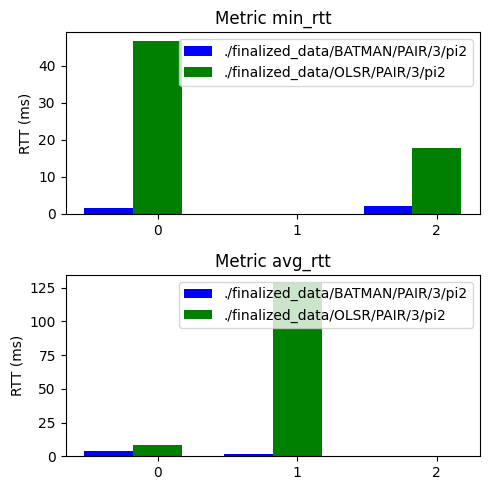

In [250]:
import os
import numpy as np
import matplotlib.pyplot as plt

# def load_data(folder_path):
#     # Implement loading data from folder_path
#     pass
metrics = ['min_rtt', 'avg_rtt', 'max_rtt', 'packet_loss']
def visualize_data(folder_paths):
    # Initialize lists to store data from both folders
    all_min_rtts = []
    all_avg_rtts = []
    all_max_rtts = []
    all_packet_loss_percentages = []
    colors = ['blue', 'green']  # Colors for different routing protocols
    print("folder paths", folder_paths)
    # Iterate through each folder path and assign color
    for i, folder_path in enumerate(folder_paths):
        # Load data from the folder
        print("FP", folder_path)
        iperf_data, ping_data = load_data(folder_path)
        print(folder_path)
        print("ping daata", ping_data)

        # Plot ping metrics for each node
        ips = ping_data['ips']
        data = ping_data['data']

        # Extracting data
        min_rtts = []
        avg_rtts = []
        max_rtts = []
        packet_loss_percentages = []

        for ip in ips:
            ip_data = data[ip]
            packets_sent, packets_received, packet_loss, min_rtt, avg_rtt, max_rtt = ip_data

            if min_rtt != -1:
                min_rtts.append(float(min_rtt))
            if avg_rtt != -1:
                avg_rtts.append(float(avg_rtt))
            if max_rtt != -1:
                max_rtts.append(float(max_rtt))
            packet_loss_percentages.append(float(packet_loss))

        # Append data to the lists
        all_min_rtts.append(min_rtts)
        all_avg_rtts.append(avg_rtts)
        all_max_rtts.append(max_rtts)
        all_packet_loss_percentages.append(packet_loss_percentages)

    # Plotting
    num_metrics = 2  # Number of metrics
    num_protocols = len(folder_paths)  # Number of routing protocols
    width = 0.35  # Width of each bar

    fig, axs = plt.subplots(num_metrics, 1, figsize=(5, 5))

    for metric_idx in range(num_metrics):
        metric_data = [data[metric_idx] for data in [all_min_rtts, all_avg_rtts, all_max_rtts, all_packet_loss_percentages]]
        # metric_data = metric_data[:3]
        print(metric_data)

        x = np.arange(len(metric_data[0]))  # the label locations

        for protocol_idx in range(num_protocols):
            axs[metric_idx].bar(x + width * protocol_idx, metric_data[protocol_idx], width, label=folder_paths[protocol_idx], color=colors[protocol_idx])

        # Add labels and title
        axs[metric_idx].set_ylabel('RTT (ms)' if metric_idx < 3 else 'Packet Loss (%)')
        axs[metric_idx].set_title('Metric {}'.format(metrics[metric_idx]))
        axs[metric_idx].set_xticks(x + width * num_protocols / 2)
        axs[metric_idx].set_xticklabels([str(i) for i in range(len(metric_data[0]))])
        axs[metric_idx].legend()

    plt.tight_layout()
    plt.show()

# Modify main function to pass both folder paths
def main(root_folder):
    folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2'),
        os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2')
    ]
    print("folder paths", folder_paths)
    visualize_data(folder_paths)
    
# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)


# iperf3 Analysis #1

searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/BATMAN/PAIR/3/pi2
searching for files in:  ./finalized_data/OLSR/PAIR/3/pi2
searching for files in:  ./finalized_data/OLSR/PAIR/3/pi2
searching for files in:  ./finalized_data/OLSR/PAIR/3/pi2
searching for files in:  ./finalized_data/OLSR/PAIR/3/pi2


IndexError: list index out of range

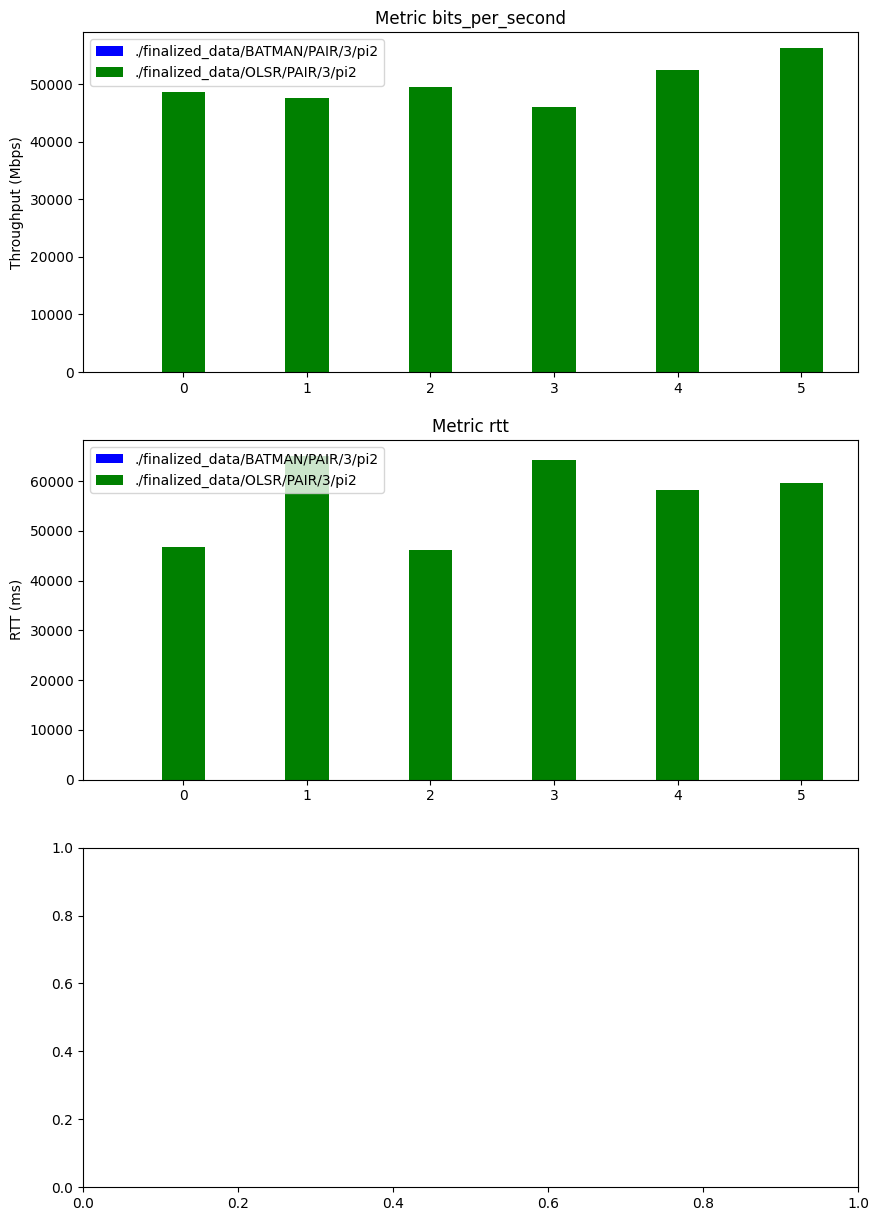

In [116]:
# do the same for iperf data
# have a separate chart for each metric
# have them on a bar chart with the different metrics on the y axis and the routing protocols on the x axis

def visualize_data(folder_paths):
    # Initialize lists to store data from both folders
    all_throughputs = []
    all_rtts = []
    all_window_sizes = []
    colors = ['blue', 'green']  # Colors for different routing protocols

    # Iterate through each folder path and assign color
    for i, folder_path in enumerate(folder_paths):
        # Load data from the folder
        iperf_data, ping_data = load_data(folder_path)

        # Extract interval data
        intervals = iperf_data['intervals']
        metric_names = ['bits_per_second', 'rtt', 'snd_wnd', 'rcv_wnd', 'cwnd', 'pmtu']

        # Calculate throughput for each interval
        throughputs = []
        for interval in intervals:
            throughput = interval['sum']['bits_per_second'] / 1e6  # Mbps
            throughputs.append(throughput)
        all_throughputs.append(throughputs)

        # Calculate RTT for each interval
        rtts = []
        for interval in intervals:
            if 'streams' in interval:
                for stream in interval['streams']:
                    if 'rtt' in stream:
                        rtts.append(stream['rtt'])
        all_rtts.append(rtts)

        # Calculate window size for each interval
        window_sizes = []
        for interval in intervals:
            if 'streams' in interval:
                for stream in interval['streams']:
                    if 'snd_wnd' in stream:
                        window_sizes.append(stream['snd_wnd'])
        all_window_sizes.append(window_sizes)

    # Plotting
    num_metrics = 3  # Number of metrics
    num_protocols = len(folder_paths)  # Number of routing protocols
    width = 0.35  # Width of each bar

    fig, axs = plt.subplots(num_metrics, 1, figsize=(10, 15))

    for metric_idx in range(num_metrics):
        metric_data = [data[metric_idx] for data in [all_throughputs, all_rtts, all_window_sizes]]
        x = np.arange(len(metric_data[0]))  # the label locations

        for protocol_idx in range(num_protocols):
            axs[metric_idx].bar(x + width * protocol_idx, metric_data[protocol_idx], width, label=folder_paths[protocol_idx], color=colors[protocol_idx])

        # Add labels and title
        axs[metric_idx].set_ylabel('Throughput (Mbps)' if metric_idx == 0 else 'RTT (ms)' if metric_idx == 1 else 'Window Size (bytes)')
        axs[metric_idx].set_title('Metric {}'.format(metric_names[metric_idx]))
        axs[metric_idx].set_xticks(x + width * num_protocols / 2)
        axs[metric_idx].set_xticklabels([str(i) for i in range(len(metric_data[0]))])
        axs[metric_idx].legend()
        
    plt.tight_layout()
    plt.show()

# Modify main function to pass both folder paths
def main(root_folder):
    folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2'),
        os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2')
    ]
    visualize_data(folder_paths)

# Define the root folder
root_folder = './finalized_data/'

# Call the main function
main(root_folder)



# iperf3 Analysis #2

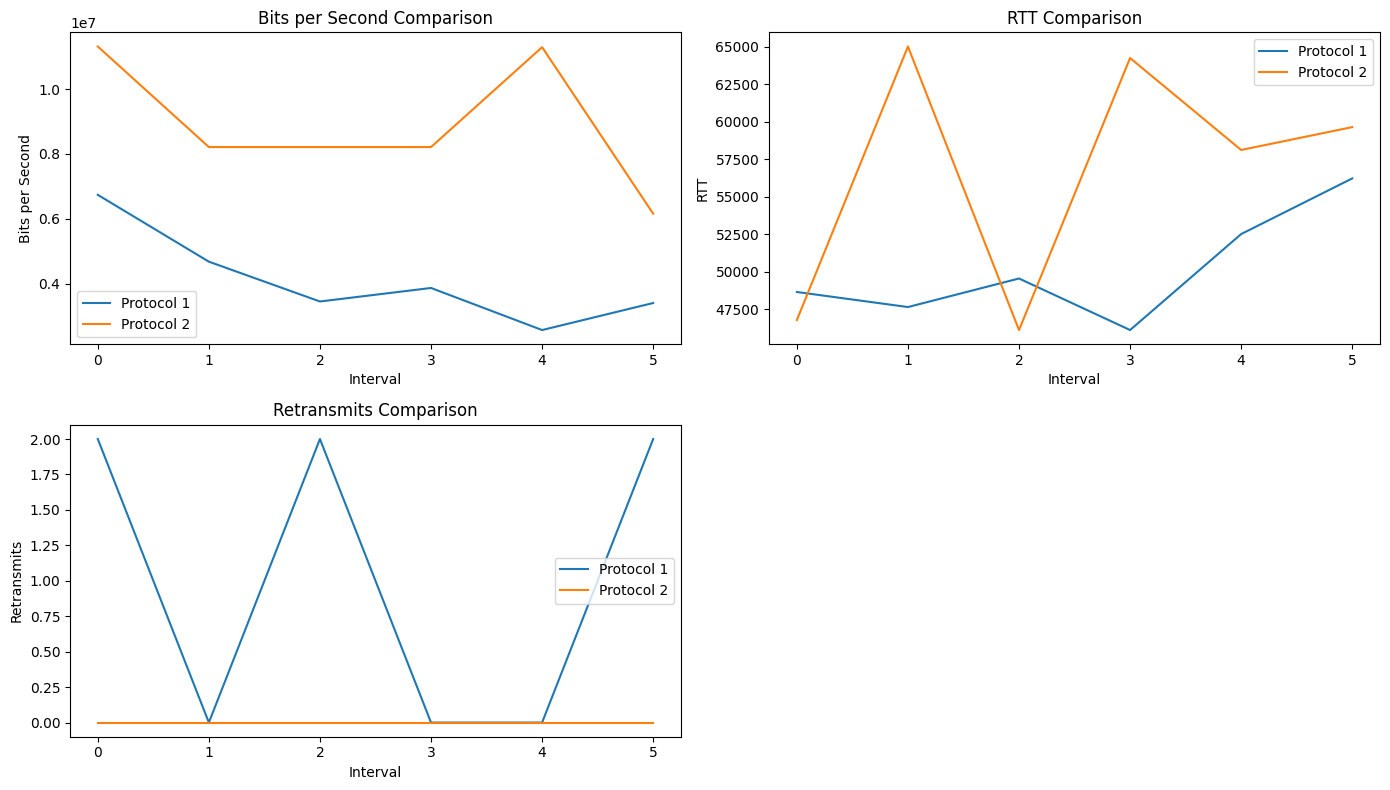

In [178]:
import json
import pandas as pd
import matplotlib.pyplot as plt
folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2', 'iperf1.json'),
        os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2', 'iperf1.json')
    ]
# Load JSON data from both files
with open(folder_paths[0], 'r') as f1:
    data1 = json.load(f1)

with open(folder_paths[1], 'r') as f2:
    data2 = json.load(f2)

# Extract relevant data
def extract_data(json_data):
    intervals_data = []
    for interval in json_data['intervals']:
        # for stream in interval['streams']:
        # if 'streams' in interval:
            stream = interval['streams'][0]
            stream_data = {
                'socket': stream['socket'],
                # 'start': interval['start'],
                # 'end': interval['end'],
                'seconds': stream['seconds'],
                'bytes': stream['bytes'],
                'bits_per_second': stream.get('bits_per_second', None),
                'retransmits': stream.get('retransmits', None),
                'rtt': stream['rtt'],
                'sender': stream.get('sender', None),
                # 'protocol': interval['sum']['protocol']
            }
            intervals_data.append(stream_data)
    return intervals_data

data1_extracted = extract_data(data1)
data2_extracted = extract_data(data2)

# Create DataFrame
df1 = pd.DataFrame(data1_extracted)
df2 = pd.DataFrame(data2_extracted)

# Plotting
plt.figure(figsize=(14, 8))

# Plot Mbps
plt.subplot(2, 2, 1)
plt.plot(df1.index, df1['bits_per_second'], label='Protocol 1')
plt.plot(df2.index, df2['bits_per_second'], label='Protocol 2')
plt.xlabel('Interval')
plt.ylabel('Mbps')
plt.title('Bits per Second Comparison')
plt.legend()

# Plot RTT
plt.subplot(2, 2, 2)
plt.plot(df1.index, df1['rtt'], label='Protocol 1')
plt.plot(df2.index, df2['rtt'], label='Protocol 2')
plt.xlabel('Interval')
plt.ylabel('RTT')
plt.title('RTT Comparison')
plt.legend()

# Plot Retransmits
plt.subplot(2, 2, 3)
plt.plot(df1.index, df1['retransmits'], label='Protocol 1')
plt.plot(df2.index, df2['retransmits'], label='Protocol 2')
plt.xlabel('Interval')
plt.ylabel('Retransmits')
plt.title('Retransmits Comparison')
plt.legend()

plt.tight_layout()
plt.show()


# iperf3 Analysis #3

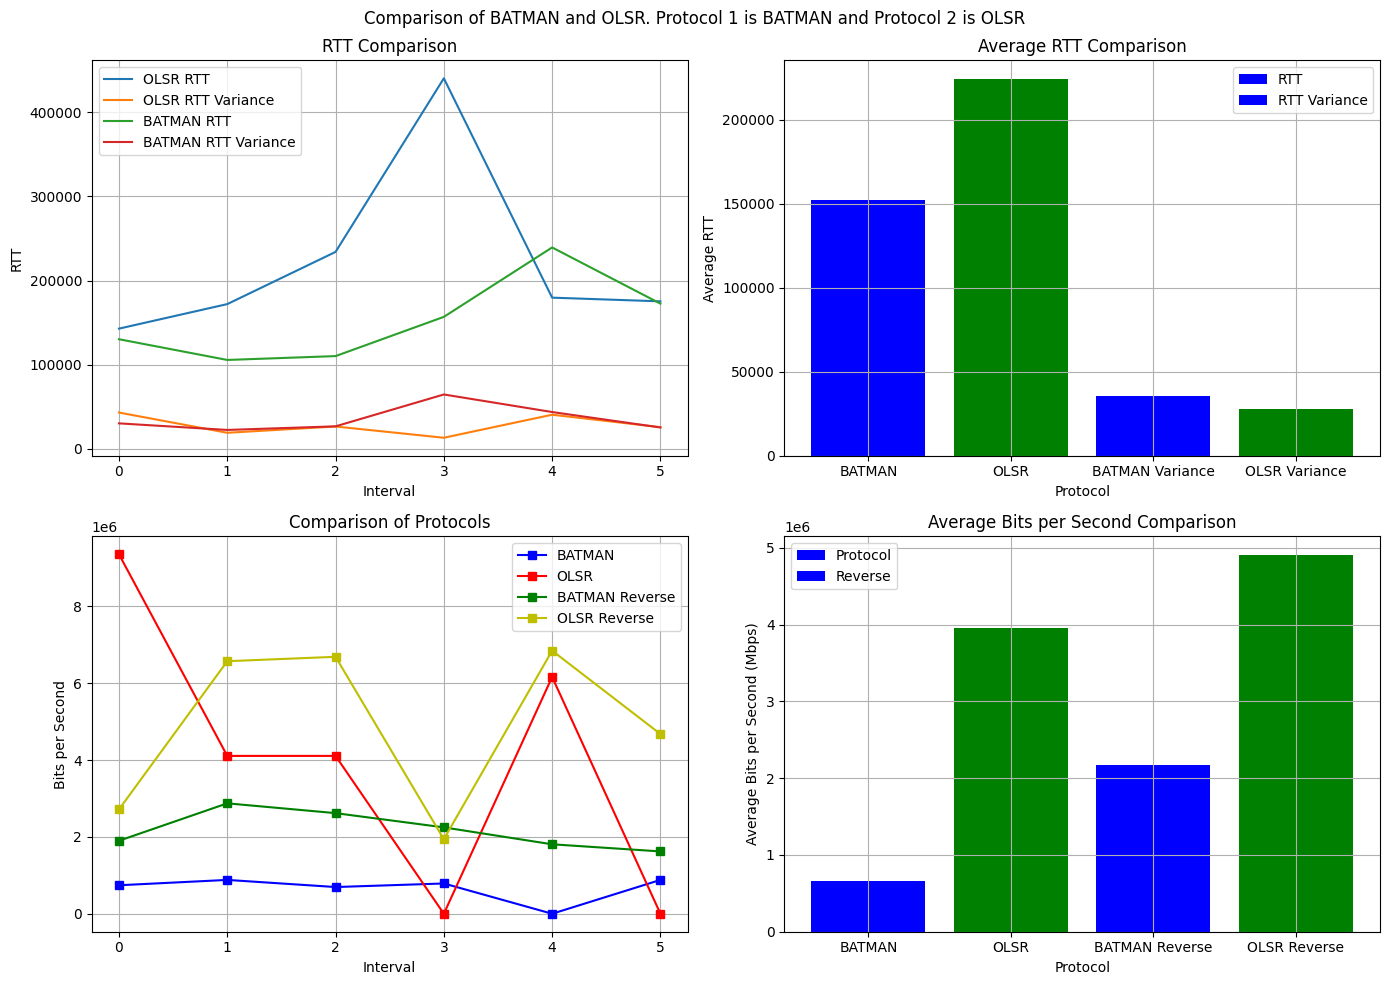

In [181]:
import json
import pandas as pd
import matplotlib.pyplot as plt

folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2', 'iperf0.json'),
        os.path.join(root_folder, 'OLSR', 'MESH', '3', 'pi2', 'iperf0.json')
    ]
# Load JSON data from both files
with open(folder_paths[0], 'r') as f1:
    data1 = json.load(f1)

with open(folder_paths[1], 'r') as f2:
    data2 = json.load(f2)

# Extract relevant data
bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

reverse_bits_per_second_data1 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data1['intervals']]
reverse_bits_per_second_data2 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data2['intervals']]

olsr_rtt = [interval['streams'][0]['rtt'] for interval in data2['intervals']]
olsr_rtt_var = [interval['streams'][0]['rttvar'] for interval in data2['intervals']]
batman_rtt = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
batman_rtt_var = [interval['streams'][0]['rttvar'] for interval in data1['intervals']]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# main title for the entire plot
fig.suptitle('Comparison of BATMAN and OLSR. Protocol 1 is BATMAN and Protocol 2 is OLSR')
# Plot RTT Comparison
axs[0, 0].plot(range(len(olsr_rtt)), olsr_rtt, label='OLSR RTT')
axs[0, 0].plot(range(len(olsr_rtt_var)), olsr_rtt_var, label='OLSR RTT Variance')
axs[0, 0].plot(range(len(batman_rtt)), batman_rtt, label='BATMAN RTT')
axs[0, 0].plot(range(len(batman_rtt_var)), batman_rtt_var, label='BATMAN RTT Variance')
axs[0, 0].set_xlabel('Interval')
axs[0, 0].set_ylabel('RTT')
axs[0, 0].set_title('RTT Comparison')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Average RTT Comparison
axs[0, 1].bar(['BATMAN', 'OLSR'], [sum(batman_rtt) / len(batman_rtt), sum(olsr_rtt) / len(olsr_rtt)], label='RTT',color=['blue', 'green'])
axs[0, 1].bar(['BATMAN Variance', 'OLSR Variance'], [sum(batman_rtt_var) / len(batman_rtt_var), sum(olsr_rtt_var) / len(olsr_rtt_var)], label='RTT Variance',color=['blue', 'green'])
axs[0, 1].set_xlabel('Protocol')
axs[0, 1].set_ylabel('Average RTT')
axs[0, 1].set_title('Average RTT Comparison')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot Comparison of Protocols
df = pd.DataFrame({
    'Protocol1': bits_per_second_data1,
    'Protocol2': bits_per_second_data2,
    'Reverse1': reverse_bits_per_second_data1,
    'Reverse2': reverse_bits_per_second_data2
})

axs[1, 0].plot(df.index, df['Protocol1'], label='BATMAN', color='b', marker='s')
axs[1, 0].plot(df.index, df['Protocol2'], label='OLSR', color='r', marker='s')
axs[1, 0].plot(df.index, df['Reverse1'], label='BATMAN Reverse', color='g', marker='s')
axs[1, 0].plot(df.index, df['Reverse2'], label='OLSR Reverse', color='y', marker='s')
axs[1, 0].set_xlabel('Interval')
axs[1, 0].set_ylabel('Bits per Second')
axs[1, 0].set_title('Comparison of Protocols')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Average Bits per Second per Protocol
axs[1, 1].bar(['BATMAN', 'OLSR'], [df['Protocol1'].mean(), df['Protocol2'].mean()], label='Protocol', color=['blue', 'green'])
axs[1, 1].bar(['BATMAN Reverse', 'OLSR Reverse'], [df['Reverse1'].mean(), df['Reverse2'].mean()], label='Reverse', color=['blue', 'green'])
axs[1, 1].set_xlabel('Protocol')
axs[1, 1].set_ylabel('Average Bits per Second (Mbps)')
axs[1, 1].set_title('Average Bits per Second Comparison')
axs[1, 1].legend()
axs[1, 1].grid(True)


plt.tight_layout()
plt.show()




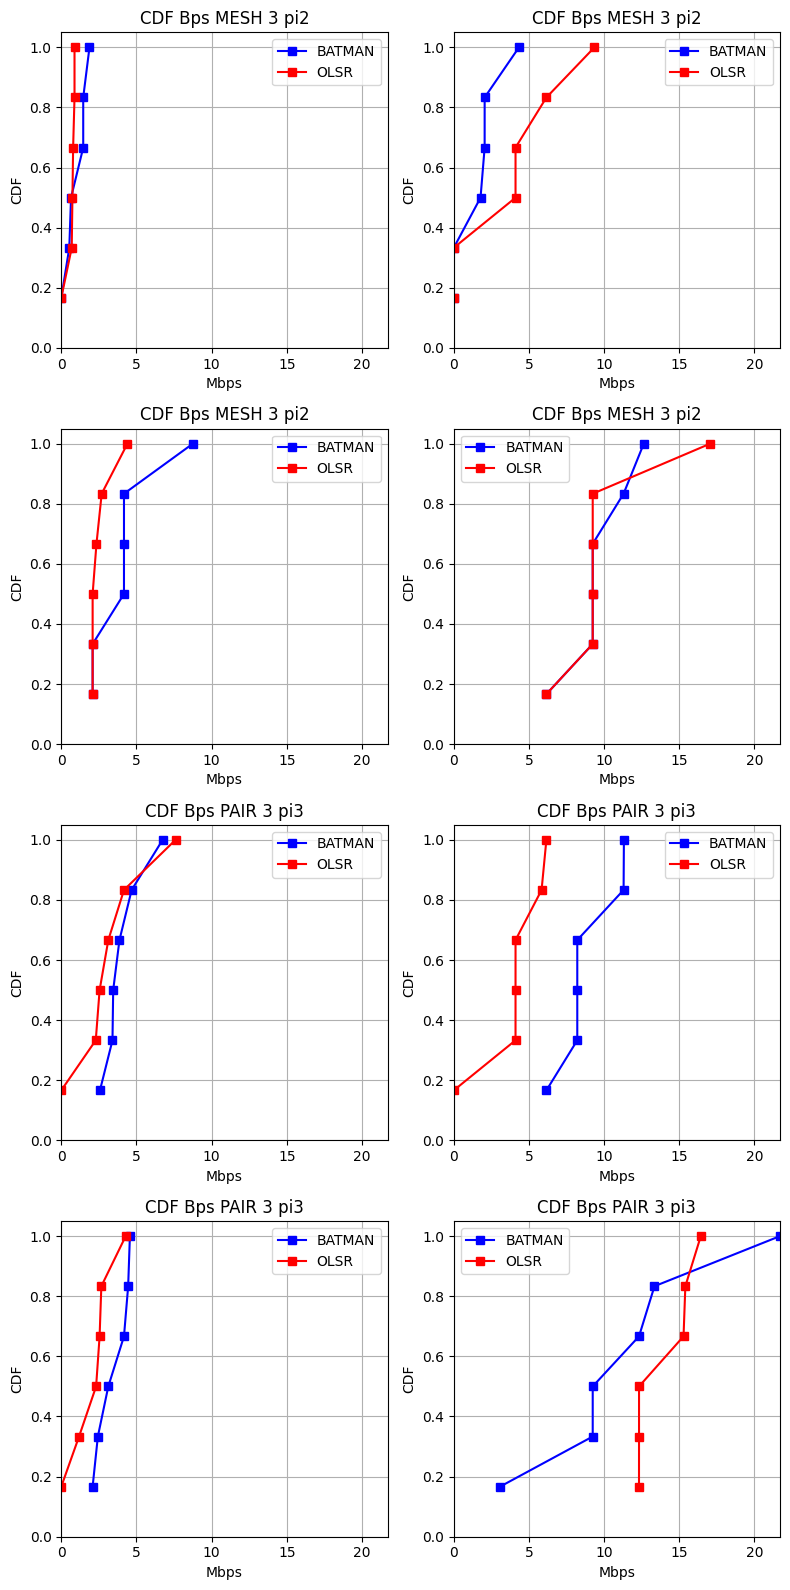

In [344]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_cdf_comparison(root_folder, pi_folders, topologies, protocols=('BATMAN', 'OLSR')):
    """
    Plots the CDF comparison of specified protocols.

    Parameters:
    root_folder (str): The root folder containing the data files.
    pi_folders (list): A list of Pi folder names to include in the analysis (e.g., ['pi2', 'pi3']).
    topologies (list): A list of topology names to include in the analysis (e.g., ['MESH', 'PAIR']).
    protocols (tuple): A tuple containing protocol names to compare (default=('BATMAN', 'OLSR')).
    """
    folder_paths = []
    for topology in topologies:
        for pi_folder in pi_folders:
            folder_paths.extend([
                (os.path.join(root_folder, protocol, topology, '3', pi_folder, 'iperf1.json'),
                 os.path.join(root_folder, protocol, topology, '3', pi_folder, 'iperf0.json'))
                for protocol in protocols
            ])

    fig, axs = plt.subplots(len(pi_folders) * len(topologies), 2, figsize=(8, 4 * len(pi_folders) * len(topologies)))

    x_min, x_max = float('inf'), float('-inf')
    y_min, y_max = 0, 1.05  

    for i, (path1, path2) in enumerate(folder_paths):
        with open(path1, 'r') as f1:
            data1 = json.load(f1)
        with open(path2, 'r') as f2:
            data2 = json.load(f2)

        bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
        bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]
        
        bits_per_second_data1 = [bps / 1e6 for bps in bits_per_second_data1]
        bits_per_second_data2 = [bps / 1e6 for bps in bits_per_second_data2]

        cdf_data1 = np.sort(bits_per_second_data1)
        cdf_data2 = np.sort(bits_per_second_data2)

        cdf = np.arange(1, len(cdf_data1) + 1) / len(cdf_data1)
        # cdf2 = np.arange(1, len(cdf_data2) + 1) / len(cdf_data2)
        # cdf = axis is np.linspace(0,1, len(sorted_data))
        row = i // 2
        col = i % 2

        axs[row, col].plot(cdf_data1, cdf1, label=protocols[0], color='b', marker='s')
        axs[row, col].plot(cdf_data2, cdf2, label=protocols[1], color='r', marker='s')
        axs[row, col].set_xlabel('Mbps')
        axs[row, col].set_ylabel('CDF')
        axs[row, col].set_title(f"CDF Bps {topologies[i // (2 * len(pi_folders))]} 3 {pi_folders[i // (2 * len(topologies))]}")
        axs[row, col].legend()
        axs[row, col].grid(True)

        x_min = min(x_min, min(cdf_data1), min(cdf_data2))
        x_max = max(x_max, max(cdf_data1), max(cdf_data2))

    for row in range(len(pi_folders) * len(topologies)):
        for col in range(2):
            axs[row, col].set_xlim(x_min, x_max)
            axs[row, col].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

root_folder = './finalized_data/'
pi_folders = ['pi2', 'pi3']
topologies = ['MESH', 'PAIR']
plot_cdf_comparison(root_folder, pi_folders, topologies)


# iperf3 Analysis #4

In [ ]:
# import json
# import pandas as pd
# import matplotlib.pyplot as plt

# # # Load JSON data from both files
# # with open('data1.json', 'r') as f1:
# #     data1 = json.load(f1)

# # with open('data2.json', 'r') as f2:
# #     data2 = json.load(f2)

# # Extract relevant data
# bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
# bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

# reverse_bits_per_second_data1 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data1['intervals']]
# reverse_bits_per_second_data2 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data2['intervals']]

# olsr_rtt = [interval['streams'][0]['rtt'] for interval in data2['intervals']]
# olsr_rtt_var = [interval['streams'][0]['rttvar'] for interval in data2['intervals']]
# batman_rtt = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
# batman_rtt_var = [interval['streams'][0]['rttvar'] for interval in data1['intervals']]

# # Plotting
# fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# # main title for the entire plot
# fig.suptitle('Comparison of BATMAN and OLSR. Protocol 1 is BATMAN and Protocol 2 is OLSR')

# # Plot RTT Comparison
# axs[0, 0].plot(range(len(olsr_rtt)), olsr_rtt, label='OLSR RTT', color='blue')
# axs[0, 0].plot(range(len(olsr_rtt_var)), olsr_rtt_var, label='OLSR RTT Variance', color='lightblue')
# axs[0, 0].plot(range(len(batman_rtt)), batman_rtt, label='BATMAN RTT', color='green')
# axs[0, 0].plot(range(len(batman_rtt_var)), batman_rtt_var, label='BATMAN RTT Variance', color='lightgreen')
# axs[0, 0].set_xlabel('Interval')
# axs[0, 0].set_ylabel('RTT')
# axs[0, 0].set_title('RTT Comparison')
# axs[0, 0].legend()
# axs[0, 0].grid(True)

# # Plot Average RTT Comparison
# axs[0, 1].bar(['BATMAN', 'OLSR'], [sum(batman_rtt) / len(batman_rtt), sum(olsr_rtt) / len(olsr_rtt)], label='RTT', color=['green', 'blue'])
# axs[0, 1].bar(['BATMAN Variance', 'OLSR Variance'], [sum(batman_rtt_var) / len(batman_rtt_var), sum(olsr_rtt_var) / len(olsr_rtt_var)], label='RTT Variance', color=['lightgreen', 'lightblue'])
# axs[0, 1].set_xlabel('Protocol')
# axs[0, 1].set_ylabel('Average RTT')
# axs[0, 1].set_title('Average RTT Comparison')
# axs[0, 1].legend()
# axs[0, 1].grid(True)

# # Plot Comparison of Protocols
# df = pd.DataFrame({
#     'Protocol1': bits_per_second_data1,
#     'Protocol2': bits_per_second_data2,
#     'Reverse1': reverse_bits_per_second_data1,
#     'Reverse2': reverse_bits_per_second_data2
# })

# axs[1, 0].plot(df.index, df['Protocol1'], label='BATMAN', color='blue', marker='s')
# axs[1, 0].plot(df.index, df['Protocol2'], label='OLSR', color='green', marker='s')
# axs[1, 0].plot(df.index, df['Reverse1'], label='BATMAN Reverse', color='lightblue', marker='s')
# axs[1, 0].plot(df.index, df['Reverse2'], label='OLSR Reverse', color='lightgreen', marker='s')
# axs[1, 0].set_xlabel('Interval')
# axs[1, 0].set_ylabel('Bits per Second')
# axs[1, 0].set_title('Comparison of Protocols')
# axs[1, 0].legend()
# axs[1, 0].grid(True)

# # Plot Average Bits per Second per Protocol
# axs[1, 1].bar(['BATMAN', 'OLSR'], [df['Protocol1'].mean(), df['Protocol2'].mean()], label='Protocol', color=['blue', 'green'])
# axs[1, 1].bar(['BATMAN Reverse', 'OLSR Reverse'], [df['Reverse1'].mean(), df['Reverse2'].mean()], label='Reverse', color=['lightblue', 'lightgreen'])
# axs[1, 1].set_xlabel('Protocol')
# axs[1, 1].set_ylabel('Average Bits per Second (Mbps)')
# axs[1, 1].set_title('Average Bits per Second Comparison')
# axs[1, 1].legend()
# axs[1, 1].grid(True)

# plt.tight_layout()
# plt.show()


In [ ]:
# import json

# # Load JSON data
# # with open('data.json', 'r') as file:
# #     data = json.load(file)

# # Extract start and end time
# start_time = data['start']['timestamp']['time']
# end_time = data['end']['streams'][0]['sender']['end']

# print("Start time:", start_time)
# print("End time:", end_time)

# # Extract bits per second and RTT for each interval
# intervals = data['intervals']
# for i, interval in enumerate(intervals, start=1):
#     print(f"\nInterval {i}:")
#     for stream in interval['streams']:
#         print("Socket:", stream['socket'])
#         print("Bits per second:", stream.get('bits_per_second', 'N/A'))
#         print("RTT:", stream.get('rtt', 'N/A'))

# # Extract sender and receiver information
# print("\nSender and Receiver Information:")
# for stream in data['end']['streams']:
#     print("Socket:", stream['sender']['socket'])
#     print("Sender Bytes:", stream['sender']['bytes'])
#     print("Receiver Bytes:", stream['receiver']['bytes'])


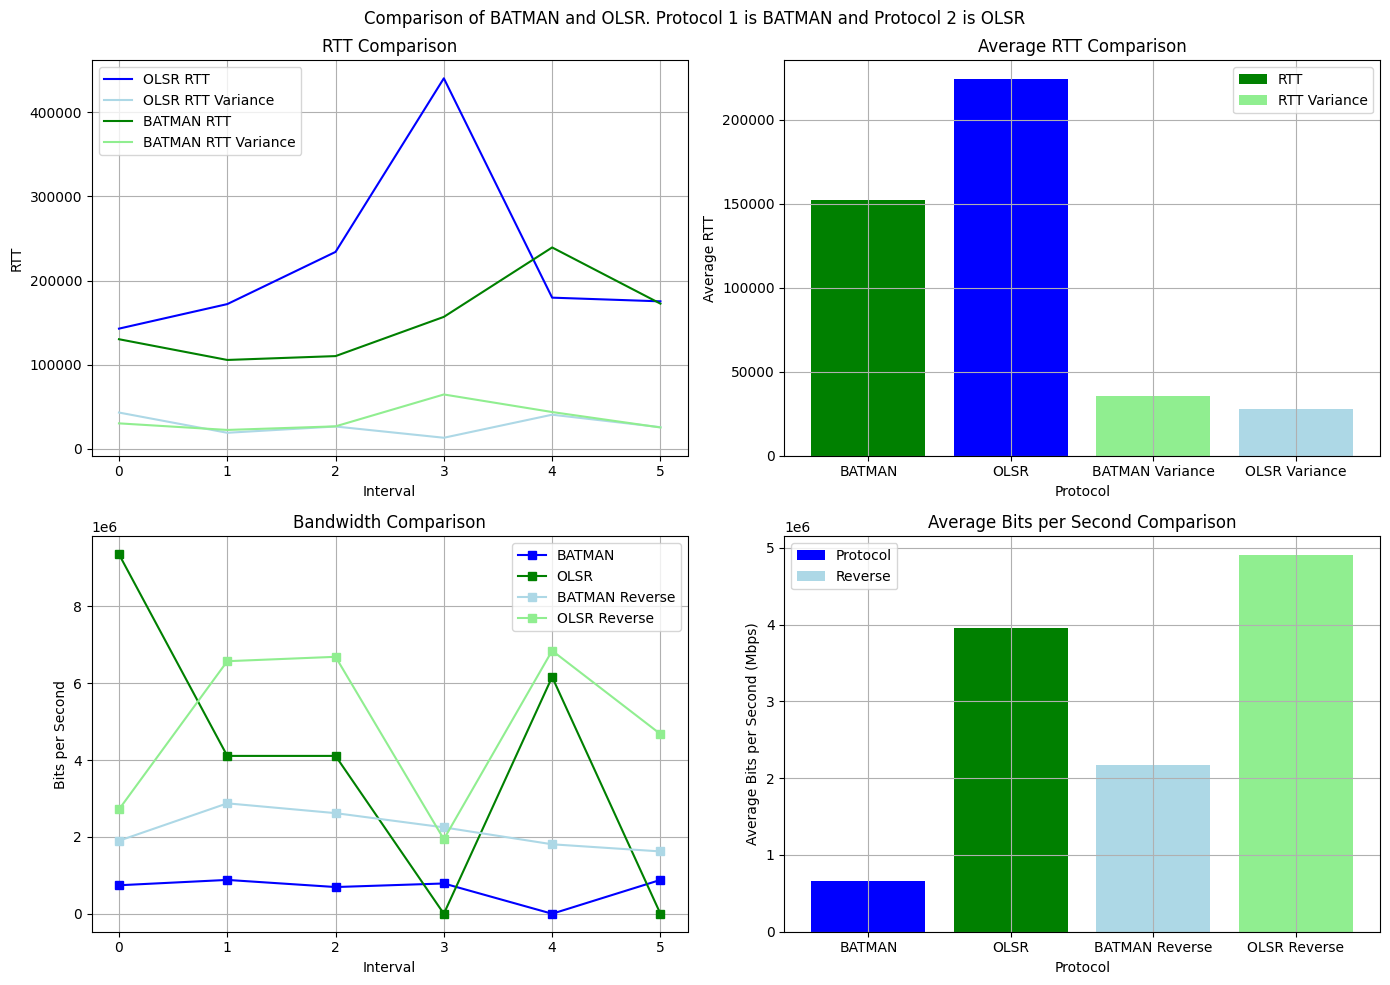

In [182]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# # Load JSON data from both files
# with open('data1.json', 'r') as f1:
#     data1 = json.load(f1)

# with open('data2.json', 'r') as f2:
#     data2 = json.load(f2)

# Extract relevant data
bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

reverse_bits_per_second_data1 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data1['intervals']]
reverse_bits_per_second_data2 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data2['intervals']]

olsr_rtt = [interval['streams'][0]['rtt'] for interval in data2['intervals']]
olsr_rtt_var = [interval['streams'][0]['rttvar'] for interval in data2['intervals']]
batman_rtt = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
batman_rtt_var = [interval['streams'][0]['rttvar'] for interval in data1['intervals']]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# main title for the entire plot
fig.suptitle('Comparison of BATMAN and OLSR. Protocol 1 is BATMAN and Protocol 2 is OLSR')

# Plot RTT Comparison
axs[0, 0].plot(range(len(olsr_rtt)), olsr_rtt, label='OLSR RTT', color='blue')
axs[0, 0].plot(range(len(olsr_rtt_var)), olsr_rtt_var, label='OLSR RTT Variance', color='lightblue')
axs[0, 0].plot(range(len(batman_rtt)), batman_rtt, label='BATMAN RTT', color='green')
axs[0, 0].plot(range(len(batman_rtt_var)), batman_rtt_var, label='BATMAN RTT Variance', color='lightgreen')
axs[0, 0].set_xlabel('Interval')
axs[0, 0].set_ylabel('RTT')
axs[0, 0].set_title('RTT Comparison')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot Average RTT Comparison
axs[0, 1].bar(['BATMAN', 'OLSR'], [sum(batman_rtt) / len(batman_rtt), sum(olsr_rtt) / len(olsr_rtt)], label='RTT', color=['green', 'blue'])
axs[0, 1].bar(['BATMAN Variance', 'OLSR Variance'], [sum(batman_rtt_var) / len(batman_rtt_var), sum(olsr_rtt_var) / len(olsr_rtt_var)], label='RTT Variance', color=['lightgreen', 'lightblue'])
axs[0, 1].set_xlabel('Protocol')
axs[0, 1].set_ylabel('Average RTT')
axs[0, 1].set_title('Average RTT Comparison')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot Comparison of Protocols
df = pd.DataFrame({
    'Protocol1': bits_per_second_data1,
    'Protocol2': bits_per_second_data2,
    'Reverse1': reverse_bits_per_second_data1,
    'Reverse2': reverse_bits_per_second_data2
})

axs[1, 0].plot(df.index, df['Protocol1'], label='BATMAN', color='blue', marker='s')
axs[1, 0].plot(df.index, df['Protocol2'], label='OLSR', color='green', marker='s')
axs[1, 0].plot(df.index, df['Reverse1'], label='BATMAN Reverse', color='lightblue', marker='s')
axs[1, 0].plot(df.index, df['Reverse2'], label='OLSR Reverse', color='lightgreen', marker='s')
axs[1, 0].set_xlabel('Interval')
axs[1, 0].set_ylabel('Bits per Second')
axs[1, 0].set_title('Bandwidth Comparison')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot Average Bits per Second per Protocol
axs[1, 1].bar(['BATMAN', 'OLSR'], [df['Protocol1'].mean(), df['Protocol2'].mean()], label='Protocol', color=['blue', 'green'])
axs[1, 1].bar(['BATMAN Reverse', 'OLSR Reverse'], [df['Reverse1'].mean(), df['Reverse2'].mean()], label='Reverse', color=['lightblue', 'lightgreen'])
axs[1, 1].set_xlabel('Protocol')
axs[1, 1].set_ylabel('Average Bits per Second (Mbps)')
axs[1, 1].set_title('Average Bits per Second Comparison')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


# Cross examination of architectures using iperf3 

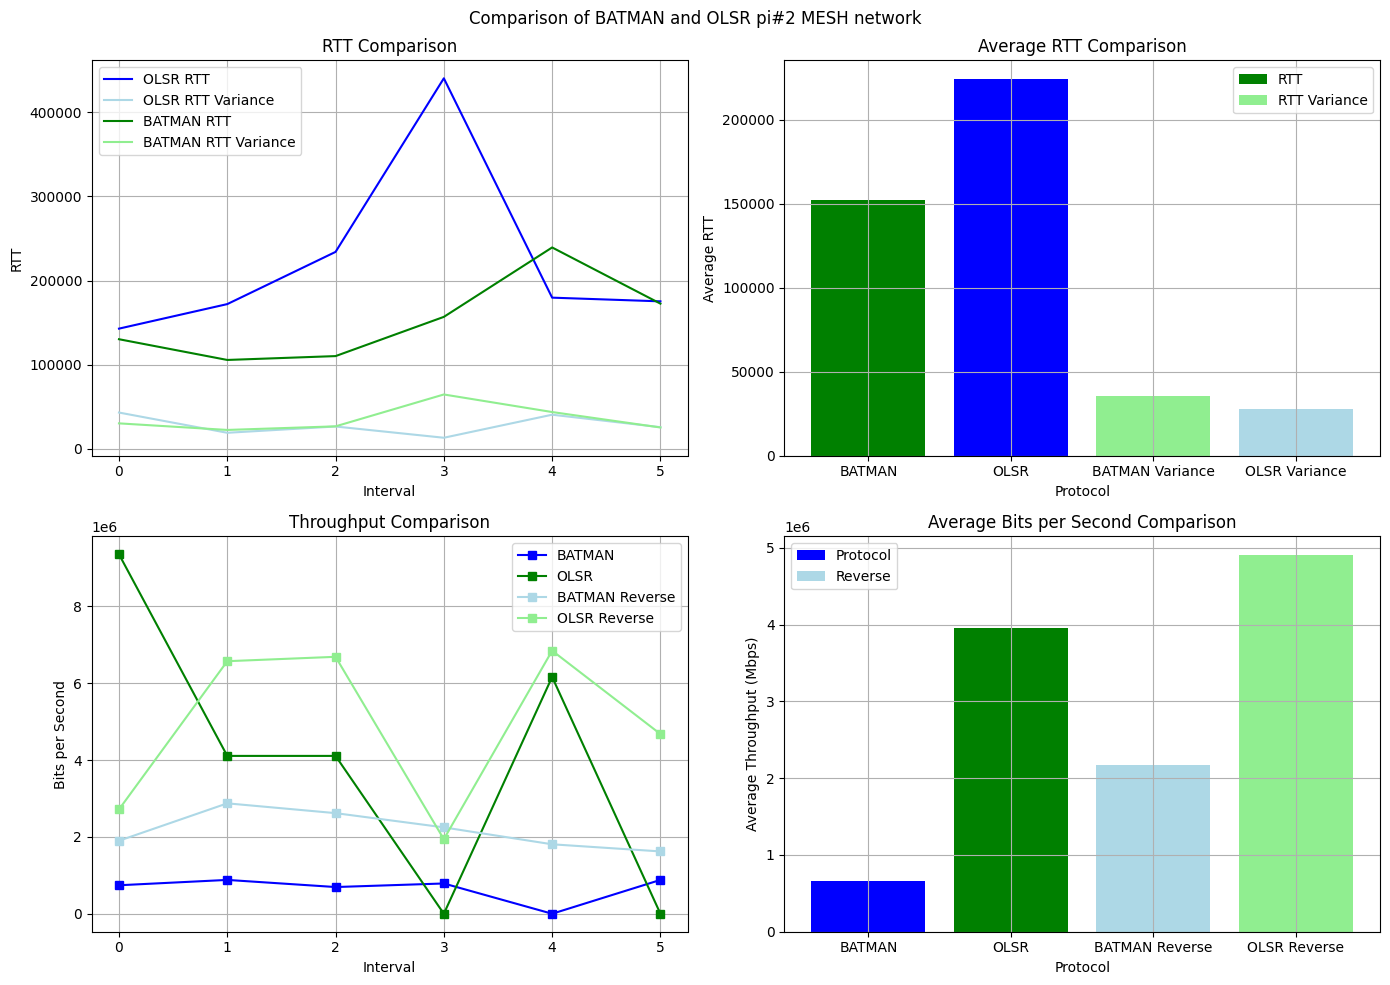

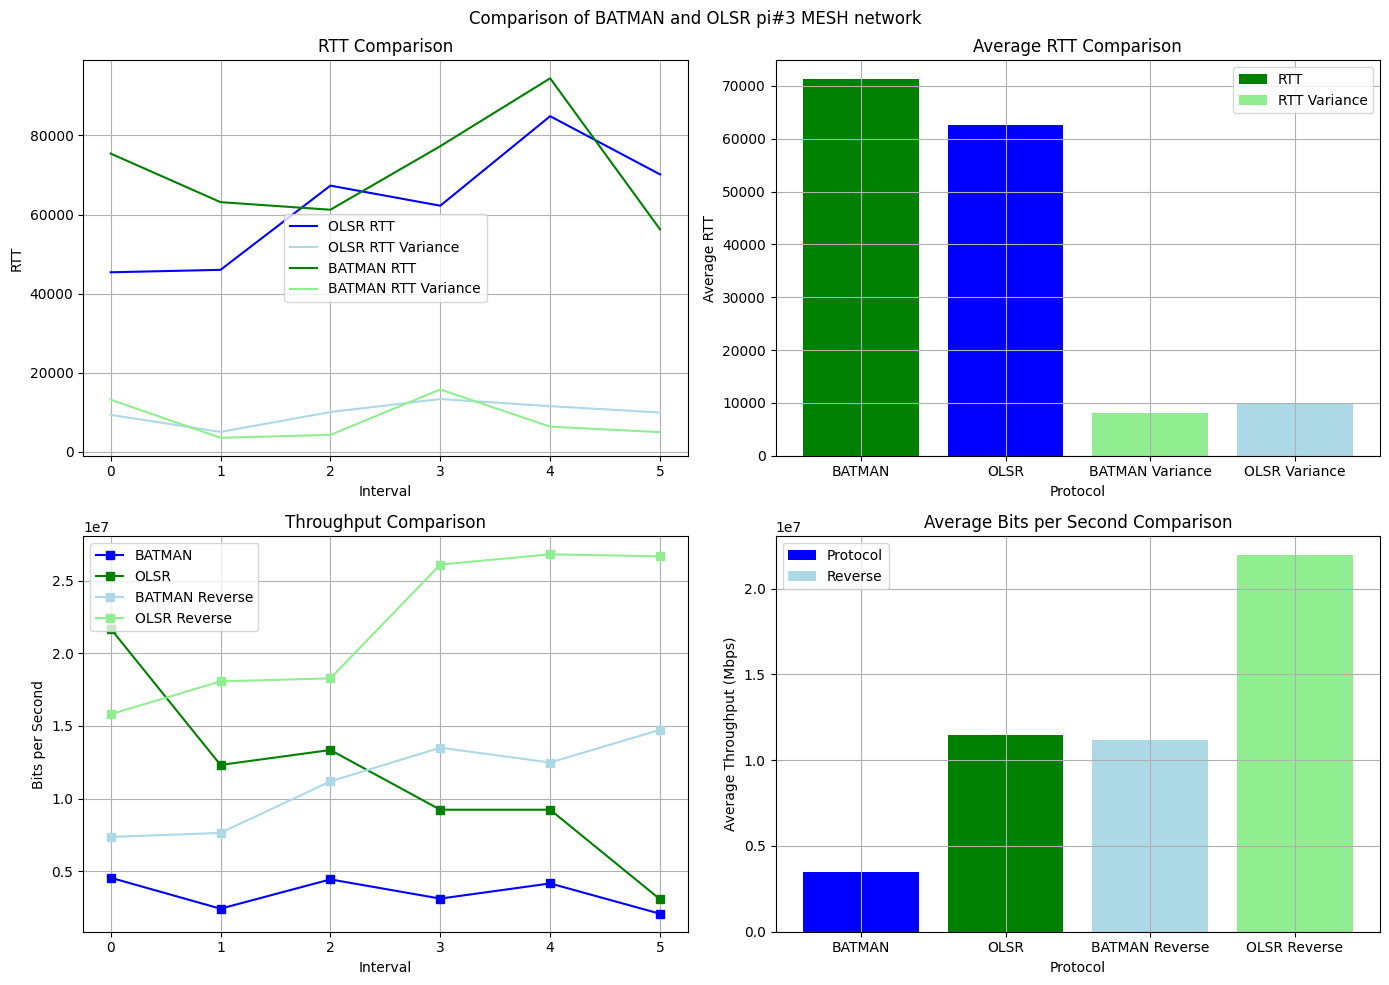

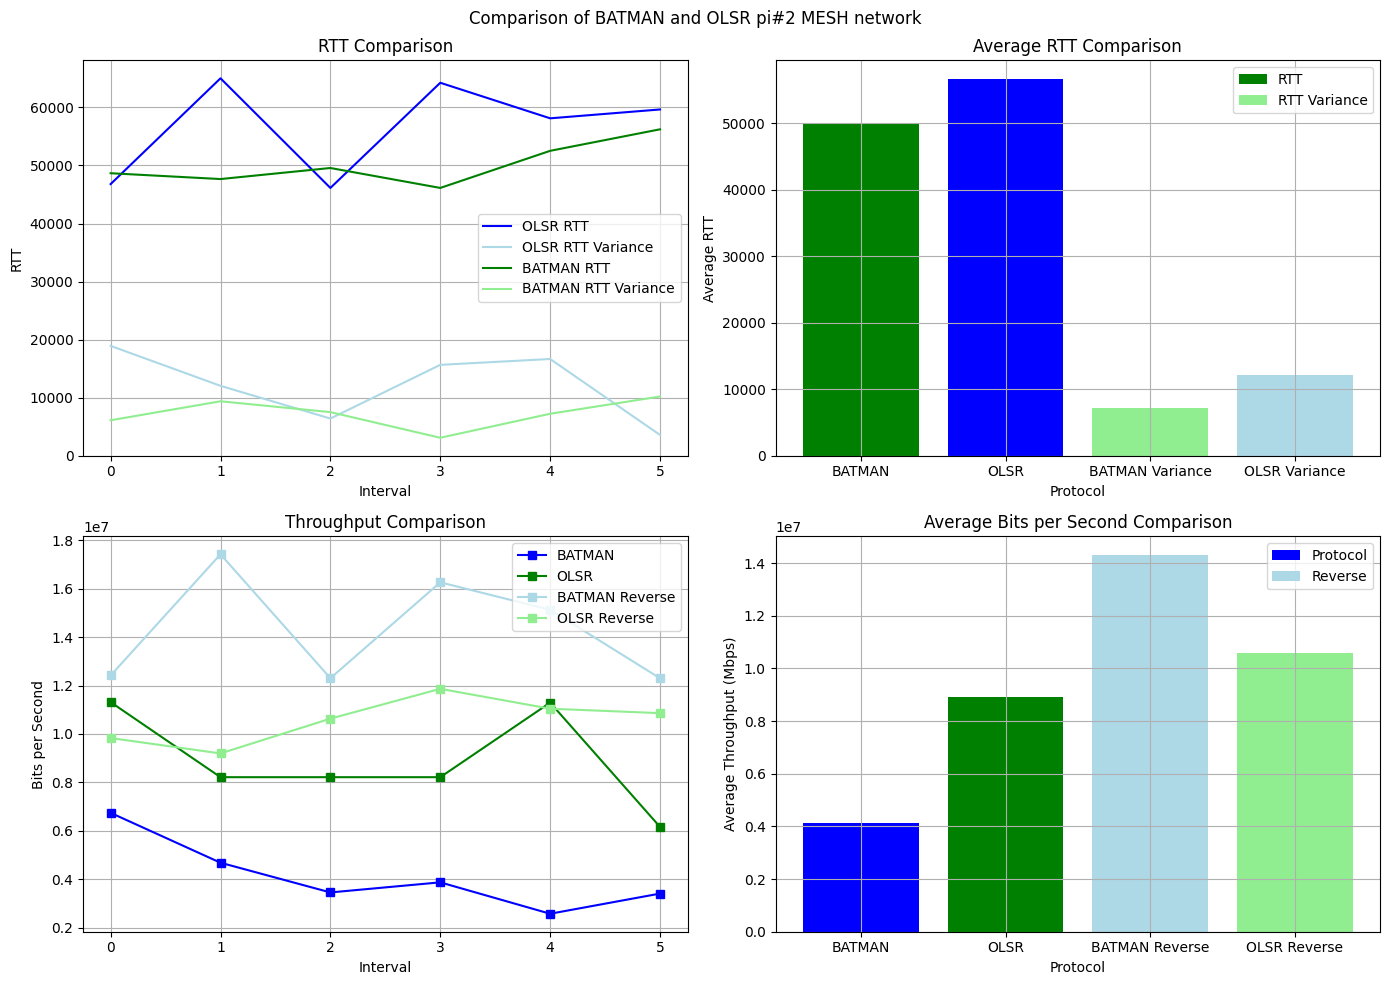

In [246]:
def plotter(data1, data2, title):
    if not title :
        title ="Comparison of BATMAN and OLSR. Protocol 1 is BATMAN and Protocol 2 is OLSR'"
    # Extract relevant data
    bits_per_second_data1 = [interval['sum']['bits_per_second'] for interval in data1['intervals']]
    bits_per_second_data2 = [interval['sum']['bits_per_second'] for interval in data2['intervals']]

    reverse_bits_per_second_data1 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data1['intervals']]
    reverse_bits_per_second_data2 = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data2['intervals']]

    olsr_rtt = [interval['streams'][0]['rtt'] for interval in data2['intervals']]
    olsr_rtt_var = [interval['streams'][0]['rttvar'] for interval in data2['intervals']]
    batman_rtt = [interval['streams'][0]['rtt'] for interval in data1['intervals']]
    batman_rtt_var = [interval['streams'][0]['rttvar'] for interval in data1['intervals']]

    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    # main title for the entire plot
    fig.suptitle(title)

    # Plot RTT Comparison
    axs[0, 0].plot(range(len(olsr_rtt)), olsr_rtt, label='OLSR RTT', color='blue')
    axs[0, 0].plot(range(len(olsr_rtt_var)), olsr_rtt_var, label='OLSR RTT Variance', color='lightblue')
    axs[0, 0].plot(range(len(batman_rtt)), batman_rtt, label='BATMAN RTT', color='green')
    axs[0, 0].plot(range(len(batman_rtt_var)), batman_rtt_var, label='BATMAN RTT Variance', color='lightgreen')
    axs[0, 0].set_xlabel('Interval')
    axs[0, 0].set_ylabel('RTT')
    axs[0, 0].set_title('RTT Comparison')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plot Average RTT Comparison
    axs[0, 1].bar(['BATMAN', 'OLSR'], [sum(batman_rtt) / len(batman_rtt), sum(olsr_rtt) / len(olsr_rtt)], label='RTT', color=['green', 'blue'])
    axs[0, 1].bar(['BATMAN Variance', 'OLSR Variance'], [sum(batman_rtt_var) / len(batman_rtt_var), sum(olsr_rtt_var) / len(olsr_rtt_var)], label='RTT Variance', color=['lightgreen', 'lightblue'])
    axs[0, 1].set_xlabel('Protocol')
    axs[0, 1].set_ylabel('Average RTT')
    axs[0, 1].set_title('Average RTT Comparison')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Plot Comparison of Protocols
    
    df = pd.DataFrame({
        'Protocol1': bits_per_second_data1,
        'Protocol2': bits_per_second_data2,
        'Reverse1': reverse_bits_per_second_data1,
        'Reverse2': reverse_bits_per_second_data2
    })

    axs[1, 0].plot(df.index, df['Protocol1'], label='BATMAN', color='blue', marker='s')
    axs[1, 0].plot(df.index, df['Protocol2'], label='OLSR', color='green', marker='s')
    axs[1, 0].plot(df.index, df['Reverse1'], label='BATMAN Reverse', color='lightblue', marker='s')
    axs[1, 0].plot(df.index, df['Reverse2'], label='OLSR Reverse', color='lightgreen', marker='s')

    axs[1, 0].set_xlabel('Interval')
    axs[1, 0].set_ylabel('Bits per Second')
    axs[1, 0].set_title('Throughput Comparison')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # Plot Average Bits per Second per Protocol
    axs[1, 1].bar(['BATMAN', 'OLSR'], [df['Protocol1'].mean(), df['Protocol2'].mean()], label='Protocol', color=['blue', 'green'])
    axs[1, 1].bar(['BATMAN Reverse', 'OLSR Reverse'], [df['Reverse1'].mean(), df['Reverse2'].mean()], label='Reverse', color=['lightblue', 'lightgreen'])
    axs[1, 1].set_xlabel('Protocol')
    axs[1, 1].set_ylabel('Average Throughput (Mbps)')
    axs[1, 1].set_title('Average Bits per Second Comparison')
    axs[1, 1].legend()
    axs[1, 1].grid(True)


    plt.tight_layout()
    plt.show()

folder_paths = [
        os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2', 'iperf0.json'),
        os.path.join(root_folder, 'OLSR', 'MESH', '3', 'pi2', 'iperf0.json')
    ]
# Load JSON data from both files
data1 = json.load(open( os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi2', 'iperf0.json'), 'r'))
data2 = json.load(open( os.path.join(root_folder, 'OLSR', 'MESH', '3', 'pi2', 'iperf0.json'), 'r'))
plotter(data1, data2, title='Comparison of BATMAN and OLSR pi#'+str(2)+' MESH network')

data3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
data4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
plotter(data3, data4, title='Comparison of BATMAN and OLSR pi#'+str(3)+' MESH network')

data3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
data4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
plotter(data3, data4, title='Comparison of BATMAN and OLSR pi#'+str(2)+' MESH network')

# this function will take in a list of several json files, and simply take the average of the values of the files
# we are running iperf twice, and 
def average_iperf_values(iperf_list_json):
    # initial dict to store the values
    iperf_dict = {}
    # iterate through the list of iperf files
    for f in iperf_list_json:
        # load the json file
        data = f
        # Extract relevant data
        bits_per_second_data = [interval['sum']['bits_per_second'] for interval in data['intervals']]
        reverse_bits_per_second_data = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data['intervals']]
        rtt = [interval['streams'][0]['rtt'] for interval in data['intervals']]
        rtt_var = [interval['streams'][0]['rttvar'] for interval in data['intervals']]
        # add the values to the dict
        iperf_dict['bits_per_second_data'] = bits_per_second_data
        iperf_dict['reverse_bits_per_second_data'] = reverse_bits_per_second_data
        iperf_dict['rtt'] = rtt
        iperf_dict['rtt_var'] = rtt_var
    # return the dict
    return iperf_dict

# this function will take in a list of several json files, and simply take the average of the values of the files


#  Statistics Calculator for iperf3

# to send from server to client, use -R, investigate iperf manual for birdir reverse 

In [202]:
# AVERAGER
import json
import os
import numpy as np
data_list = [data1, data2, data3, data4]
def average_json_data(json_files):
    # Initialize lists to store aggregated data
    bits_per_second = []
    reverse_bits_per_second = []
    rtt = []
    rtt_var = []

    # Iterate through each JSON file
    for file in json_files:
        # with open(file, 'r') as f:
        #     data = json.load(f)
        data = file

        # Extract relevant data from intervals
        bits_per_second_data = [interval['sum']['bits_per_second'] for interval in data['intervals']]
        reverse_bits_per_second_data = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data['intervals']]
        rtt_data = [interval['streams'][0]['rtt'] for interval in data['intervals']]
        rtt_data_sorted = np.sort(rtt_data)
        rtt_var_data = [interval['streams'][0]['rttvar'] for interval in data['intervals']]

        # x 
        # Append data to respective lists
        bits_per_second.extend(bits_per_second_data)
        reverse_bits_per_second.extend(reverse_bits_per_second_data)
        rtt.extend(rtt_data)
        rtt_var.extend(rtt_var_data)

    # Calculate averages
    avg_bits_per_second = np.mean(bits_per_second)
    avg_reverse_bits_per_second = np.mean(reverse_bits_per_second)
    avg_rtt = np.mean(rtt)
    avg_rtt_var = np.mean(rtt_var)

    return avg_bits_per_second, avg_reverse_bits_per_second, avg_rtt, avg_rtt_var

# Example usage:
# json_files = ['data1.json', 'data2.json', 'data3.json']  # List of JSON file names
avg_bits_per_second, avg_reverse_bits_per_second, avg_rtt, avg_rtt_var = average_json_data(data_list)

print("Average Bits per Second:", avg_bits_per_second)
print("Average Reverse Bits per Second:", avg_reverse_bits_per_second)
# average Mbps:
avg_bits_per_second = avg_bits_per_second / 1000000
avg_reverse_bits_per_second = avg_reverse_bits_per_second / 1000000
print("Average Bits per Second (Mbps):", avg_bits_per_second)
print("Average Reverse Bits per Second (Mbps):", avg_reverse_bits_per_second)
print("Average RTT:", avg_rtt)
print("Average RTT Variance:", avg_rtt_var)


Average Bits per Second: 4409946.036013588
Average Reverse Bits per Second: 7989799.891545947
Average Bits per Second (Mbps): 4.409946036013588
Average Reverse Bits per Second (Mbps): 7.989799891545947
Average RTT: 120796.95833333333
Average RTT Variance: 20679.125


# Averaging iperf runs 

In [257]:
import json
import numpy as np

def average_iperf_values(json_files):
    # Initialize lists to store aggregated data
    bits_per_second = []
    reverse_bits_per_second = []
    rtt = []
    rtt_var = []

    # Iterate through each JSON file
    for file in json_files:
        data = file

        # Extract relevant data from intervals
        bits_per_second_data = [interval['sum']['bits_per_second'] for interval in data['intervals']]
        reverse_bits_per_second_data = [interval['sum_bidir_reverse']['bits_per_second'] for interval in data['intervals']]
        rtt_data = [interval['streams'][0]['rtt'] for interval in data['intervals']]
        rtt_var_data = [interval['streams'][0]['rttvar'] for interval in data['intervals']]

        # Append data to respective lists
        bits_per_second.extend(bits_per_second_data)
        reverse_bits_per_second.extend(reverse_bits_per_second_data)
        rtt.extend(rtt_data)
        rtt_var.extend(rtt_var_data)

    # Calculate averages
    avg_bits_per_second = np.mean(bits_per_second)
    avg_reverse_bits_per_second = np.mean(reverse_bits_per_second)
    avg_rtt = np.mean(rtt)
    avg_rtt_var = np.mean(rtt_var)

    return {
        'bits_per_second_data': bits_per_second,
        'reverse_bits_per_second_data': reverse_bits_per_second,
        'rtt': rtt,
        'rtt_var': rtt_var,
        'avg_bits_per_second': avg_bits_per_second,
        'avg_reverse_bits_per_second': avg_reverse_bits_per_second,
        'avg_rtt': avg_rtt,
        'avg_rtt_var': avg_rtt_var
    }

# Example usage:
# Load JSON data from both files
batman1 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2', 'iperf0.json'), 'r'))
batman2 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
batman3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf0.json'), 'r'))
batman4 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
# batman5 = json.load(open( os.path.join(root_folder, 'BATMAN', 'MESH', '3', 'pi3', 'iperf0.json'), 'r'))

olsr1 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2', 'iperf0.json'), 'r')) 
olsr2 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
olsr3 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf0.json'), 'r'))
olsr4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
# plotter(data1, data2, title='Comparison of BATMAN and OLSR pi#'+str(2)+' MESH network')

# data3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))
# data4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi3', 'iperf1.json'), 'r'))

# data3 = json.load(open( os.path.join(root_folder, 'BATMAN', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
# data4 = json.load(open( os.path.join(root_folder, 'OLSR', 'PAIR', '3', 'pi2', 'iperf1.json'), 'r'))
# plotter(data3, data4, title='Comparison of BATMAN and OLSR pi#'+str(2)+' MESH network')
# json_files = data_list  # List of JSON file names
# averages = average_iperf_values([data1, data2, data3, data4])
batman_averages = average_iperf_values([batman1, batman2, batman3, batman4])
olsr_averages = average_iperf_values([olsr1, olsr2, olsr3, olsr4])
# plot the averages
# plotter(averages, averages,title='Averages of BATMAN and OLSR pi#'+str(2)+' MESH network')
# print(batman_averages)

# print(averages)


{'bits_per_second_data': [7597462.893065186, 2548485.1646528, 4170189.790338418, 3127717.471724261, 2293600.0100439577, 0, 6740553.3257520115, 4679758.03926867, 3452101.1357840076, 3869017.257284926, 2571653.21160419, 3405382.6040980383, 4285240.178321224, 2664218.685722262, 2316818.504481292, 0, 2548500.354929421, 1181508.9851712242, 4563174.510091294, 2432591.28210361, 4448282.778969805, 3127630.0390976383, 4170281.7594513646, 2084990.7538614264], 'reverse_bits_per_second_data': [9543154.60958188, 11051158.3958126, 12186221.276211156, 15337399.750233041, 10077939.438071936, 162024.01209554911, 12415589.630938413, 17421673.492722966, 12302454.383230254, 16263773.141401306, 15128734.659257079, 12301075.937252097, 3544009.4447737685, 3706739.0410048864, 4286114.23329039, 3266615.9589709747, 5699373.521023978, 3243357.998509243, 7365936.51882757, 7645286.886611348, 11190211.365845915, 13506728.24291795, 12487677.046357142, 14733934.660620747], 'rtt': [54074, 51620, 49977, 61592, 166972, 

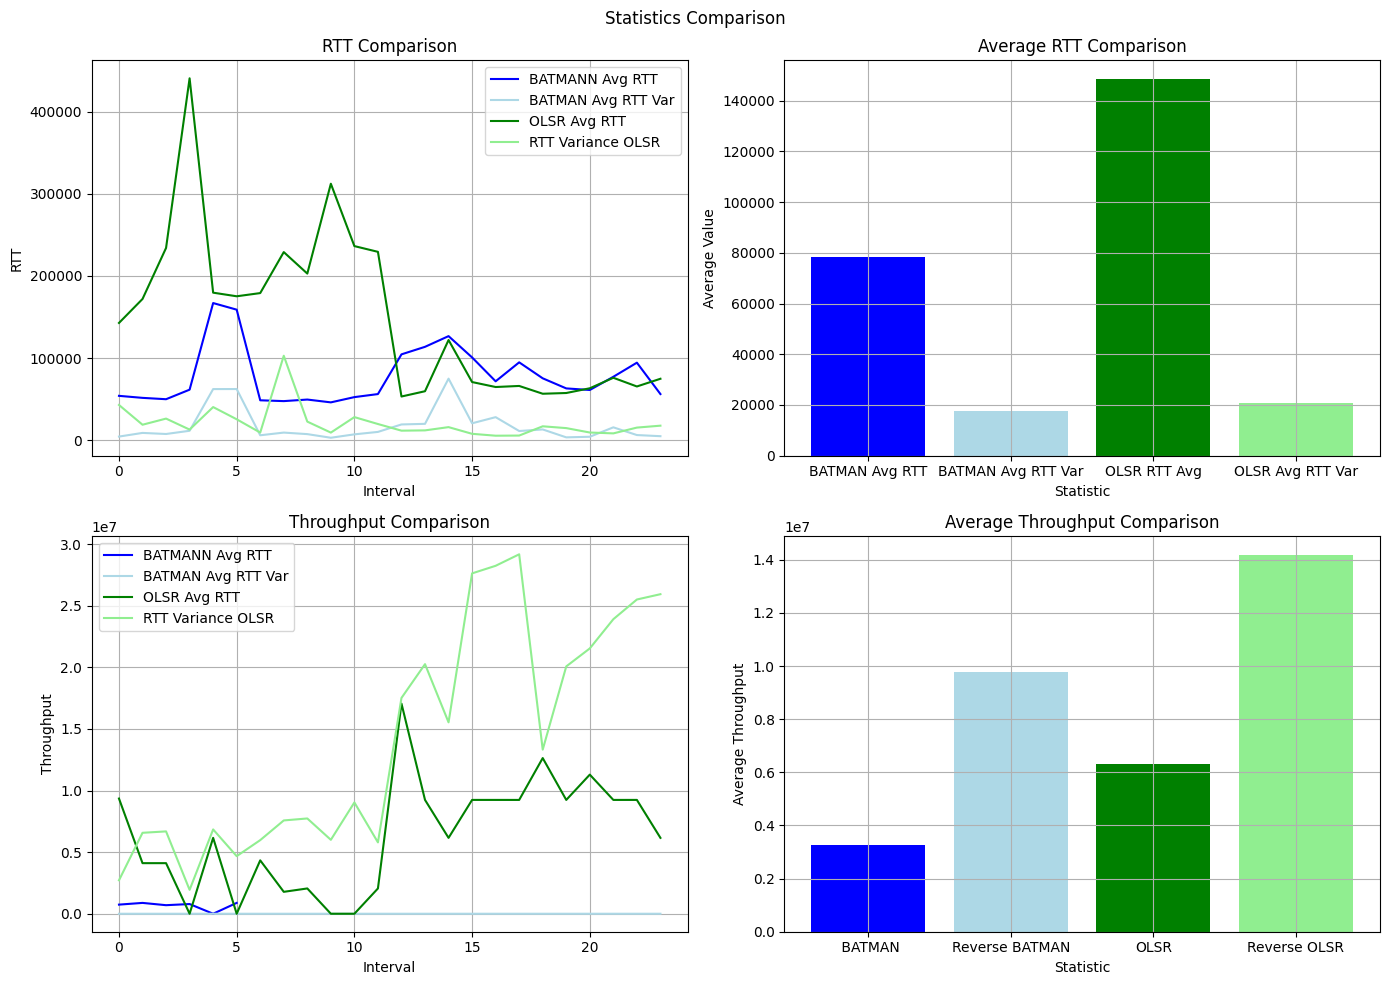

In [244]:
import matplotlib.pyplot as plt
import numpy as np

def plot_statistics(batman, olsr, title=''):
    # Unpack averages dictionary for batman
    bits_per_second_data_1 = batman['bits_per_second_data']
    reverse_bits_per_second_data_1 = batman['reverse_bits_per_second_data']
    # turn bits per second to Mbps
    bits_per_second_data_1 = [x/1000000 for x in bits_per_second_data_1]
    reverse_bits_per_second_data_1 = [x/1000000 for x in reverse_bits_per_second_data_1]
    rtt_1 = batman['rtt']
    rtt_var_1 = batman['rtt_var']
    avg_bits_per_second_1 = batman['avg_bits_per_second']
    avg_reverse_bits_per_second_1 = batman['avg_reverse_bits_per_second']
    avg_rtt_1 = batman['avg_rtt']
    avg_rtt_var_1 = batman['avg_rtt_var']

    # Unpack averages dictionary for olsr
    bits_per_second_data_2 = olsr['bits_per_second_data']
    reverse_bits_per_second_data_2 = olsr['reverse_bits_per_second_data']
    rtt_2 = olsr['rtt']
    rtt_var_2 = olsr['rtt_var']
    avg_bits_per_second_2 = olsr['avg_bits_per_second']
    avg_reverse_bits_per_second_2 = olsr['avg_reverse_bits_per_second']
    avg_rtt_2 = olsr['avg_rtt']
    avg_rtt_var_2 = olsr['avg_rtt_var']
    

    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(title)

    # Plot RTT Comparison
    axs[0, 0].plot(range(len(rtt_1)), rtt_1, label='BATMANN Avg RTT', color='blue')
    axs[0, 0].plot(range(len(rtt_var_1)), rtt_var_1, label='BATMAN Avg RTT Var', color='lightblue')
    axs[0, 0].plot(range(len(rtt_2)), rtt_2, label='OLSR Avg RTT', color='green')
    axs[0, 0].plot(range(len(rtt_var_2)), rtt_var_2, label='RTT Variance OLSR', color='lightgreen')
    axs[0, 0].set_xlabel('Interval')
    axs[0, 0].set_ylabel('RTT')
    axs[0, 0].set_title('RTT Comparison')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plot Average RTT Comparison
    axs[0, 1].bar(['BATMAN Avg RTT', 'BATMAN Avg RTT Var', 'OLSR RTT Avg', 'OLSR Avg RTT Var'],
                  [avg_rtt_1, avg_rtt_var_1, avg_rtt_2, avg_rtt_var_2],
                  color=['blue', 'lightblue', 'green', 'lightgreen'])
    axs[0, 1].set_xlabel('Statistic')
    axs[0, 1].set_ylabel('Average Value')
    axs[0, 1].set_title('Average RTT Comparison')
    axs[0, 1].grid(True)

    # Plot Throughput Comparison
    axs[1, 0].plot(range(len(bits_per_second_data1)), bits_per_second_data1, label='BATMANN Avg RTT', color='blue')
    axs[1, 0].plot(range(len(reverse_bits_per_second_data_1)), reverse_bits_per_second_data_1, label='BATMAN Avg RTT Var', color='lightblue')
    axs[1, 0].plot(range(len(bits_per_second_data_2)), bits_per_second_data_2, label='OLSR Avg RTT', color='green')
    axs[1, 0].plot(range(len(reverse_bits_per_second_data_2)), reverse_bits_per_second_data_2, label='RTT Variance OLSR', color='lightgreen')
    axs[1, 0].set_xlabel('Interval')
    axs[1, 0].set_ylabel('Throughput')
    axs[1, 0].set_title('Throughput Comparison')
    axs[1, 0].legend()
    axs[1, 0].grid(True)


    # Plot Average Throughput Comparison
    axs[1, 1].bar([' BATMAN', 'Reverse BATMAN',
                  'OLSR', 'Reverse OLSR'],
                 [avg_bits_per_second_1, avg_reverse_bits_per_second_1,
                  avg_bits_per_second_2, avg_reverse_bits_per_second_2],
                 color=['blue', 'lightblue', 'green', 'lightgreen'])
    axs[1, 1].set_xlabel('Statistic')
    axs[1, 1].set_ylabel('Average Throughput')
    axs[1, 1].set_title('Average Throughput Comparison')
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have already obtained the averages dictionaries using average_iperf_values function
# batman = average_iperf_values(batman)
# olsr = average_iperf_values([data3, data4])
plot_statistics(batman_averages, olsr_averages, title='Statistics Comparison')
